In [1]:
# Data processing libraries
import pandas as pd
import numpy as np

# Text preprocessing with NLTK
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stopwords
wn = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Topic modeling
from bertopic import BERTopic

# Dimensionality reduction for topic modeling
from umap import UMAP


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\anaconda3\envs\nlpcourse\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\anaconda3\envs\nlpcourse\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\anaconda3\envs\nlpcourse\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Install necessary libraries (if not installed already)
# !pip install bertopic umap-learn hdbscan nltk

# Data processing
import pandas as pd
import numpy as np

# Text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

# Initialize lemmatizer
wn = WordNetLemmatizer()

# Topic model
from bertopic import BERTopic

# Dimension reduction
from umap import UMAP

# Vectorization and Clustering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from hdbscan import HDBSCAN

# Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\anaconda3\envs\nlpcourse\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\anaconda3\envs\nlpcourse\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\anaconda3\envs\nlpcourse\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Import necessary module for file dialog
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import pandas as pd

# Open a file dialog to select the file
Tk().withdraw()  # Prevents the Tkinter window from showing up
file_path = askopenfilename(title="Select the CSV file", filetypes=[("CSV files", "*.csv")])

# Check if a file was selected
if file_path:
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Display the first few rows of the dataset to confirm it's loaded correctly
        print(f"File loaded successfully from: {file_path}")
        print(df.head())  # Display the first few rows
    except Exception as e:
        # Print any error that occurs during file loading
        print(f"An error occurred while loading the file: {str(e)}")
else:
    print("No file selected.")


File loaded successfully from: C:/Users/lenovo/Desktop/Bert LLM 2/scopus.csv
                                             Authors  \
0                        Steni Mol T.S.; Sreeja P.S.   
1                          Subashini K.; Narmatha V.   
2                           Guo Z.; Li J.; Ramesh R.   
3                           Gotmare P.S.; Potey M.M.   
4  Waisberg E.; Ong J.; Masalkhi M.; Zaman N.; Sa...   

                                   Author full names  \
0  Steni Mol, T.S. (57971790100); Sreeja, P.S. (5...   
1  Subashini, K. (55578386200); Narmatha, V. (572...   
2  Guo, Zhiling (49861197800); Li, Jin (571961569...   
3  Gotmare, Pradnya S. (57205389151); Potey, Mani...   
4  Waisberg, Ethan (57225197689); Ong, Joshua (57...   

                                        Author(s) ID  \
0                           57971790100; 56380319100   
1                           55578386200; 57211296791   
2               49861197800; 57196156947; 7201897779   
3                        

In [4]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure necessary NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
wn = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Add custom stopwords specific to your context (LLM/AI)
custom_stopwords = {"group", "study", "level", "activity", "method", "technology", "patient"}
stop_words.update(custom_stopwords)

# Define the LLM-related keywords for filtering documents
llm_keywords = ['large language model', 'llm', 'transformer', 'gpt', 'bert', 'generative model', 'ai', 'nlp', 'neural network', 'deep learning']

# Step 1: Check for missing data in the dataset
missing_data = df.isnull().sum()
print("\nMissing data summary:\n", missing_data)

# Display rows with missing values, if any
rows_with_missing_data = df[df.isnull().any(axis=1)]
if not rows_with_missing_data.empty:
    print("\nRows with missing data:")
    display(rows_with_missing_data)
else:
    print("\nNo missing data found in the dataset.")

# Step 2: Clean missing abstracts (important for topic modeling)
df_clean = df.dropna(subset=['Abstract'])

# Step 3: Convert abstracts to lowercase
df_clean['Abstract'] = df_clean['Abstract'].str.lower()

# Step 4: Filter documents based on LLM-related keywords
df_clean = df_clean[df_clean['Abstract'].apply(lambda text: any(keyword in text for keyword in llm_keywords))]

# Step 5: Remove special characters from the abstracts
df_clean['Abstract'] = df_clean['Abstract'].str.replace('[^a-zA-Z\s]', '', regex=True)

# Step 6: Lemmatize the abstract and remove both standard and custom stopwords
df_clean['Abstract'] = df_clean['Abstract'].apply(lambda text: ' '.join([wn.lemmatize(word) for word in text.split() if word not in stop_words]))

# Step 7: Combine 'Title' and 'Abstract' into a single text column for BERTopic modeling
df_clean['Text'] = df_clean['Title'] + ". " + df_clean['Abstract']

# Step 8: Retain relevant columns for time-series analysis and trend identification (Year, Author Keywords, etc.)
df_clean['Year'] = df_clean['Year']  # Retain the Year column
df_clean['Author Keywords'] = df_clean['Author Keywords'].fillna('')  # Fill missing keywords with an empty string

# Step 9: Remove "No abstract available" from all the document embeddings
documents_cleaned = df_clean['Text'].apply(lambda doc: doc.replace('[no abstract available]', '').strip()).tolist()

# Step 10: Display a few sample cleaned documents to verify
print("\nSample cleaned documents (first 5):\n")
for i, doc in enumerate(documents_cleaned[:5], 1):
    print(f"Document {i}:\n{doc}\n")

# Step 11: Return the cleaned DataFrame with all relevant columns (for further modeling and time-series analysis)
df_clean = df_clean[['Title', 'Abstract', 'Text', 'Year', 'Author Keywords']]
df_clean.head()



Missing data summary:
 Authors                 7
Author full names       7
Author(s) ID            7
Title                   0
Year                    0
Source title            8
Link                    0
Abstract                0
Author Keywords      1706
Index Keywords       3615
dtype: int64

Rows with missing data:


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\anaconda3\envs\nlpcourse\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\anaconda3\envs\nlpcourse\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\anaconda3\envs\nlpcourse\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Link,Abstract,Author Keywords,Index Keywords
1,Subashini K.; Narmatha V.,"Subashini, K. (55578386200); Narmatha, V. (572...",55578386200; 57211296791,MANTA RAY FORAGING OPTIMIZATION ALGORITHM WITH...,2023,Journal of Theoretical and Applied Information...,https://scopus.duelibrary.in/inward/record.uri...,"In current scenario, phishing attacks are vita...",Cybersecurity; Deep Learning; Manta Ray Foragi...,NaN
3,Gotmare P.S.; Potey M.M.,"Gotmare, Pradnya S. (57205389151); Potey, Mani...",57205389151; 57189040816,Combined Approach for Answer Identification wi...,2023,Revue d'Intelligence Artificielle,https://scopus.duelibrary.in/inward/record.uri...,In the realm of natural language understanding...,annotations; comprehension; embedding; semanti...,NaN
4,Waisberg E.; Ong J.; Masalkhi M.; Zaman N.; Sa...,"Waisberg, Ethan (57225197689); Ong, Joshua (57...",57225197689; 57214792343; 57926028400; 5721219...,"GPT-4 and medical image analysis: strengths, w...",2023,Journal of Medical Artificial Intelligence,https://scopus.duelibrary.in/inward/record.uri...,ChatGPT (Generative Pre-trained Transformer) i...,Artificial intelligence (AI); Generative Pre-t...,NaN
6,Pimentel A.; Guimarães H.R.; Avila A.; Falk T.H.,"Pimentel, Arthur (57984648600); Guimarães, Hei...",57984648600; 57984466900; 56414301600; 7004897891,Environment-Aware Knowledge Distillation for I...,2023,Applied Sciences (Switzerland),https://scopus.duelibrary.in/inward/record.uri...,Recent advances in self-supervised learning ha...,automatic speech recognition; context awarenes...,NaN
8,Yun H.; Yi E.; Song S.,"Yun, Hongoak (56146332000); Yi, Eunkyung (5721...",56146332000; 57210172220; 56652855600,Exploring AI-Generated English Relative Clause...,2023,Journal of Cognitive Science,https://scopus.duelibrary.in/inward/record.uri...,Human behavioral studies have consistently ind...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12552,Turtle D.P.; Phillipson P.H.,"Turtle, D.P. (57199627939); Phillipson, P.H. (...",57199627939; 6701807880,Simultaneous identification and control,1971,Automatica,https://scopus.duelibrary.in/inward/record.uri...,The problem of identification of a process und...,NaN,SYSTEM IDENTIFICATION; AUTOMATIC CONTROL--Anal...
12553,MEHAUTE LE B.,"MEHAUTE LE, B. (6504468416)",6504468416,SPECIAL CONSIDERATION ON THE DESIGN OF AN LNG ...,1974,PROC. 14TH. ASCE COASTAL ENGNG. CONF. (COPENHA...,https://scopus.duelibrary.in/inward/record.uri...,ONE OF THE PRIMARY CONSIDERATIONS IN THE DESIG...,NaN,HARBOURS; L.N.G; TANKERS (SHIPS
12554,Akaike H.,"Akaike, Hirotugu (7003985470)",7003985470,Canonical correlation analysis of time series ...,1976,Mathematics in Science and Engineering,https://scopus.duelibrary.in/inward/record.uri...,This chapter starts with a brief introductory ...,NaN,NaN
12555,Tong H.,"Tong, Howell (7201359749)",7201359749,More on Autoregressive Model Fitting with Nois...,1977,IEEE Transactions on Information Theory,https://scopus.duelibrary.in/inward/record.uri...,"Tong has proposed an objective method, based o...",NaN,INFORMATION THEORY



Sample cleaned documents (first 5):

Document 1:
Adam Adadelta Optimization based bidirectional encoder representations from transformers model for fake news detection on social media. social platform disseminated news rapid speed considered important news resource many people worldwide easy access le cost benefit compared traditional news organization fake news news deliberately written bad writer manipulates original content rapid dissemination fake news may mislead people society result critical investigate veracity data leaked via social medium platform even reliability information reported via platform still doubtful remains significant obstacle result proposes promising technique identifying fake information social medium called adam adadelta optimization based deep long shortterm memory deep lstm tokenization operation case carried bidirectional encoder representation transformer bert approach measurement feature reduced assistance kernel linear discriminant analysis lda singul

,Title,Abstract,Text,Year,Author Keywords
0,Adam Adadelta Optimization based bidirectional...,social platform disseminated news rapid speed ...,Adam Adadelta Optimization based bidirectional...,2023,adam optimizer; Fake news detection; kernel li...
1,MANTA RAY FORAGING OPTIMIZATION ALGORITHM WITH...,current scenario phishing attack vital threat ...,MANTA RAY FORAGING OPTIMIZATION ALGORITHM WITH...,2023,Cybersecurity; Deep Learning; Manta Ray Foragi...
3,Combined Approach for Answer Identification wi...,realm natural language understanding machine r...,Combined Approach for Answer Identification wi...,2023,annotations; comprehension; embedding; semanti...
4,"GPT-4 and medical image analysis: strengths, w...",chatgpt generative pretrained transformer arti...,"GPT-4 and medical image analysis: strengths, w...",2023,Artificial intelligence (AI); Generative Pre-t...
5,AlgBERT: Automatic Construction of Annotated C...,nowadays sentiment analysis one crucial resear...,AlgBERT: Automatic Construction of Annotated C...,2023,Annotated corpus; BERT; deep learning


In [8]:
# Step 1: Import necessary modules
from bertopic import BERTopic
from umap import UMAP
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN
import pandas as pd

# Step 2: Define UMAP parameters for dimensionality reduction (optimized for accuracy)
umap_model = UMAP(
    n_neighbors=10,    # More local structure for better clustering
    n_components=5,    # Lower dimensionality for faster clustering
    min_dist=0.0,      # Tighter packing of clusters
    metric='cosine',   # Cosine distance fits well with transformer-based embeddings
    random_state=42    # Ensure reproducibility
)

# Step 3: Define HDBSCAN clustering model with tuned parameters
hdbscan_model = HDBSCAN(
    min_cluster_size=15,  # Focus on slightly larger clusters
    min_samples=5,        # Moderate outlier handling
    metric='euclidean',   # Euclidean distance for cluster calculation
    prediction_data=True  # Allow predictions for new documents
)

# Step 4: Initialize SentenceTransformer model (optimized for accuracy)
# 'all-mpnet-base-v2' is more accurate but slower than 'all-MiniLM-L6-v2'
sentence_model = SentenceTransformer('all-mpnet-base-v2')

# Step 5: Expanded list of keywords to filter documents related to LLMs and Generative AI
llm_keywords = [
    # LLM models
    'gpt', 'chatgpt', 'bert', 'transformer', 't5', 'gpt-3', 'gpt-4', 'xlm', 'roberta', 'albert', 
    'xlm-roberta', 'electra', 'ctrl',
    
    # Generative AI models
    'autoregressive', 'generative', 'variational autoencoder', 'vae', 'gan', 'deepfakes', 'stylegan', 
    'diffusion models', 'stable diffusion', 'latent space', 'nlp', 'neural networks',
    
    # Applications and related terms
    'language model', 'self-supervised', 'few-shot', 'zero-shot', 'transfer learning', 
    'fine-tuning', 'prompt engineering', 'unsupervised', 'pre-training', 'masked language model'
]

# Step 6: Filter documents based on the expanded list of LLM and Generative AI keywords
documents_cleaned_filtered = [doc for doc in documents_cleaned if any(keyword in doc.lower() for keyword in llm_keywords)]

# Step 7: Initialize BERTopic with pre-trained embeddings and accuracy-focused settings
topic_model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=sentence_model,  # Use the pre-trained sentence transformer for embeddings
    nr_topics=15,                    # Limit the number of topics to 15
    top_n_words=10,                  # Show the top 10 words per topic
    calculate_probabilities=True     # Calculate probabilities for topic visualization
)

# Step 8: Generate embeddings using the SentenceTransformer model
embeddings = sentence_model.encode(documents_cleaned_filtered, show_progress_bar=True)

# Step 9: Fit the BERTopic model and transform the data
topics, probabilities = topic_model.fit_transform(documents_cleaned_filtered, embeddings=embeddings)

# Step 10: Display top topics and their words (with 10 words per topic)
print("\nMost common topics (with top 10 words):\n")
topic_info = topic_model.get_topic_info()
for i in range(len(topic_info)):
    topic = topic_model.get_topic(i)
    if topic:
        print(f"Topic {i}:")
        for word, score in topic[:10]:  # Display top 10 words for each topic
            print(f"  {word}: {score:.4f}")
    print("\n")

# Step 11: Visualize topics over time
topics_over_time = topic_model.topics_over_time(docs=documents_cleaned_filtered, topics=topics, timestamps=df_clean['Year'])
topic_model.visualize_topics_over_time(topics_over_time)

# Step 12: Visualize the topic distribution for the first document (optional)
topic_model.visualize_distribution(probabilities[0], min_probability=0.015)

# (Optional) Save the BERTopic model for further analysis
# topic_model.save("BERTopic_model_llm_trends")


Batches:   0%|          | 0/303 [00:00<?, ?it/s]


Most common topics (with top 10 words):

Topic 0:
  model: 0.0324
  language: 0.0248
  bert: 0.0218
  text: 0.0217
  task: 0.0193
  learning: 0.0192
  information: 0.0172
  based: 0.0154
  sentiment: 0.0154
  representation: 0.0153


Topic 1:
  model: 0.0457
  autoregressive: 0.0404
  time: 0.0254
  series: 0.0246
  data: 0.0238
  spatial: 0.0196
  forecasting: 0.0194
  prediction: 0.0164
  parameter: 0.0154
  of: 0.0146


Topic 2:
  image: 0.0465
  learning: 0.0378
  selfsupervised: 0.0298
  network: 0.0227
  feature: 0.0222
  supervised: 0.0210
  data: 0.0208
  model: 0.0207
  proposed: 0.0180
  method: 0.0174


Topic 3:
  signal: 0.0328
  model: 0.0304
  autoregressive: 0.0266
  data: 0.0191
  using: 0.0189
  proposed: 0.0188
  time: 0.0185
  system: 0.0176
  eeg: 0.0174
  ar: 0.0173


Topic 4:
  transformer: 0.1052
  power: 0.0460
  model: 0.0428
  winding: 0.0407
  voltage: 0.0331
  transient: 0.0313
  frequency: 0.0288
  circuit: 0.0287
  current: 0.0269
  core: 0.0231


Topic 5

ValueError: array length 9677 does not match index length 10539

In [11]:
# Step 9: Fit the BERTopic model and transform the data
topics, probabilities = topic_model.fit_transform(documents_cleaned_filtered, embeddings=embeddings)

# Step 10: Display top topics and their words (with 10 words per topic)
print("\nMost common topics (with top 10 words):\n")
topic_info = topic_model.get_topic_info()
for i in range(len(topic_info)):
    topic = topic_model.get_topic(i)
    if topic:
        print(f"Topic {i}:")
        for word, score in topic[:10]:  # Display top 10 words for each topic
            print(f"  {word}: {score:.4f}")
    print("\n")

# Updated Code: Ensure lengths of documents_cleaned_filtered, topics, and timestamps match
# Step 10.1: Filter timestamps to match filtered documents
timestamps_filtered = df_clean['Year'][df_clean['Document'].isin(documents_cleaned_filtered)]

# Step 10.2: Check lengths of the arrays before proceeding
assert len(documents_cleaned_filtered) == len(topics) == len(timestamps_filtered), \
    "Mismatch in lengths of documents, topics, and timestamps."

# Step 11: Visualize topics over time
topics_over_time = topic_model.topics_over_time(docs=documents_cleaned_filtered, topics=topics, timestamps=timestamps_filtered)
topic_model.visualize_topics_over_time(topics_over_time)

# Step 12: Visualize the topic distribution for the first document (optional)
topic_model.visualize_distribution(probabilities[0], min_probability=0.015)

# (Optional) Save the BERTopic model for further analysis
# topic_model.save("BERTopic_model_llm_trends")



Most common topics (with top 10 words):

Topic 0:
  model: 0.0324
  language: 0.0248
  bert: 0.0218
  text: 0.0217
  task: 0.0193
  learning: 0.0192
  information: 0.0172
  based: 0.0154
  sentiment: 0.0154
  representation: 0.0153


Topic 1:
  model: 0.0457
  autoregressive: 0.0404
  time: 0.0254
  series: 0.0246
  data: 0.0238
  spatial: 0.0196
  forecasting: 0.0194
  prediction: 0.0164
  parameter: 0.0154
  of: 0.0146


Topic 2:
  image: 0.0465
  learning: 0.0378
  selfsupervised: 0.0298
  network: 0.0227
  feature: 0.0222
  supervised: 0.0210
  data: 0.0208
  model: 0.0207
  proposed: 0.0180
  method: 0.0174


Topic 3:
  signal: 0.0328
  model: 0.0304
  autoregressive: 0.0266
  data: 0.0191
  using: 0.0189
  proposed: 0.0188
  time: 0.0185
  system: 0.0176
  eeg: 0.0174
  ar: 0.0173


Topic 4:
  transformer: 0.1052
  power: 0.0460
  model: 0.0428
  winding: 0.0407
  voltage: 0.0331
  transient: 0.0313
  frequency: 0.0288
  circuit: 0.0287
  current: 0.0269
  core: 0.0231


Topic 5

KeyError: 'Document'

In [41]:
import pandas as pd

# Step 1: Initialize an empty list to store the topic details
topic_data = []

# Step 2: Extract the top 15 topics (based on the topic occurrence count or another criterion)
top_15_topic_ids = topic_info['Topic'][:15]  # Get the top 15 topics from the topic_info dataframe

# Step 3: Loop over each of the top 15 topics and extract the details
for topic_id in top_15_topic_ids:
    topic_words = topic_model.get_topic(topic_id)  # Get the top words for this topic
    if topic_words:
        # Get the top 6 words and their probabilities for the current topic
        top_words = [word for word, score in topic_words[:10]]
        word_probs = [f"{score:.4f}" for word, score in topic_words[:10]]
        
        # Append the topic details (topic number, top 6 words, word probabilities) to the list
        topic_data.append({
            'Topic ID': topic_id,
            'Top 10 Words': ', '.join(top_words),  # Join the top words as a comma-separated string
            'Word Probabilities': ', '.join(word_probs)  # Join the word probabilities as a comma-separated string
        })

# Step 4: Convert the list of topic details to a DataFrame
topic_df = pd.DataFrame(topic_data)

# Step 5: Display the DataFrame containing the top 10 topics with their words and probabilities
topic_df


ValueError: This BERTopic instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

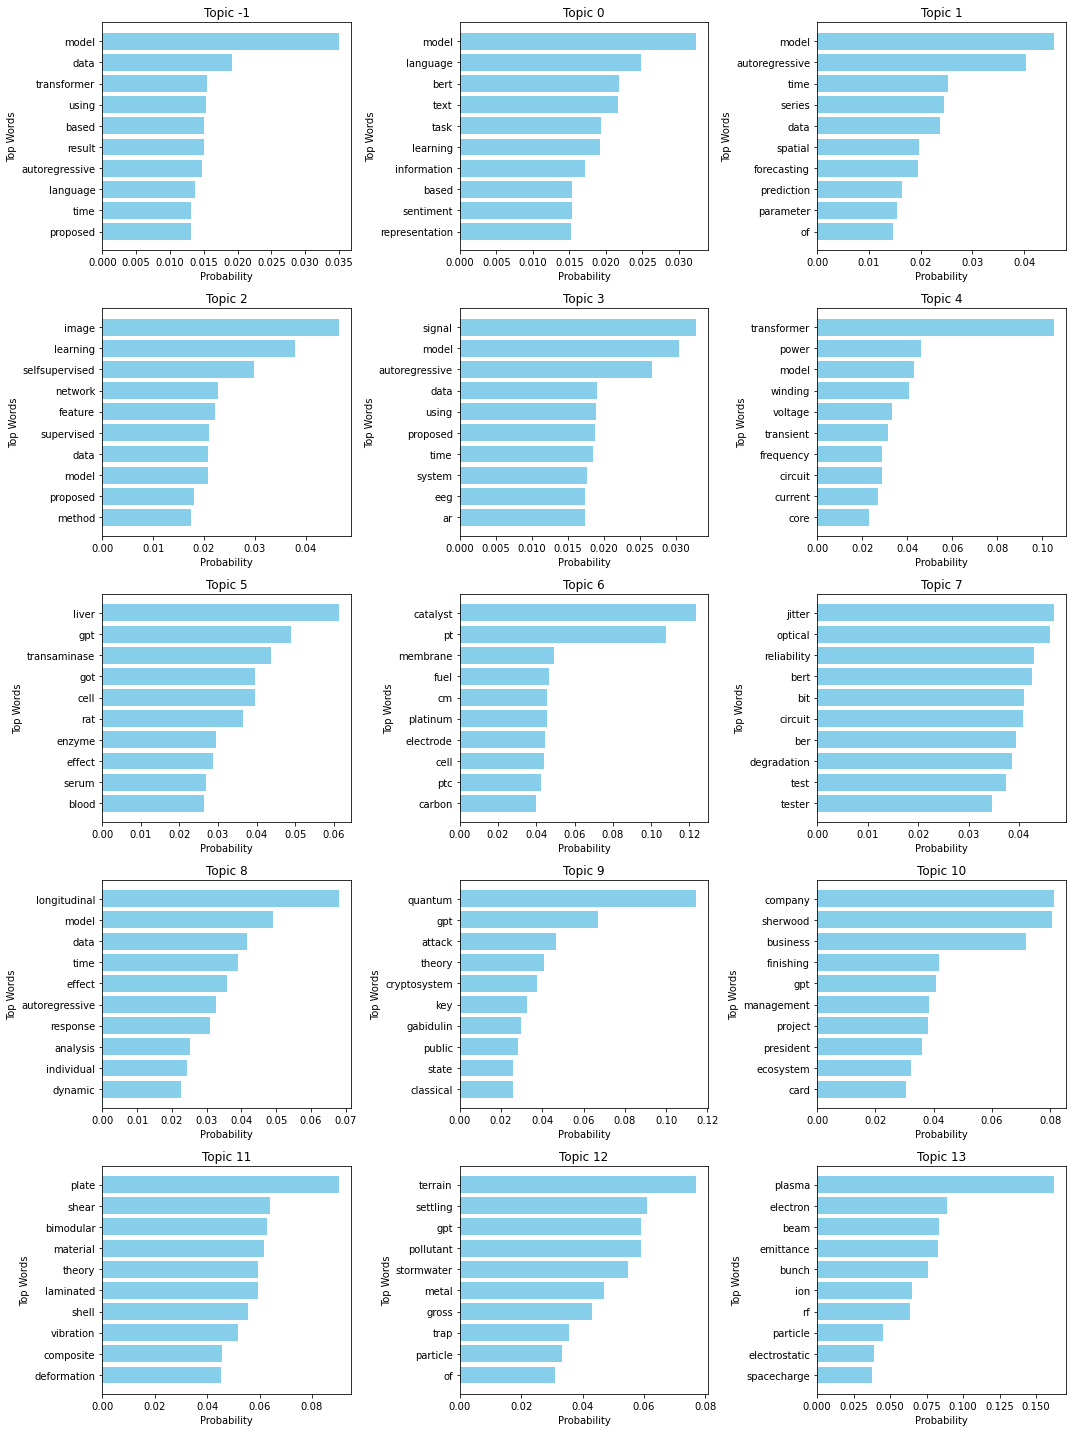

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Initialize an empty list to store the topic details
topic_data = []

# Step 2: Extract the top 15 topics (based on the topic occurrence count or another criterion)
top_15_topic_ids = topic_info['Topic'][:15]  # Get the top 15 topics from the topic_info dataframe

# Step 3: Loop over each of the top 15 topics and extract the details
for topic_id in top_15_topic_ids:
    topic_words = topic_model.get_topic(topic_id)  # Get the top words for this topic
    if topic_words:
        # Get the top 10 words and their probabilities for the current topic
        top_words = [word for word, score in topic_words[:10]]
        word_probs = [score for word, score in topic_words[:10]]
        
        # Append the topic details (topic number, top 10 words, word probabilities) to the list
        topic_data.append({
            'Topic ID': topic_id,
            'Top 10 Words': top_words,  # List of top words
            'Word Probabilities': word_probs  # List of word probabilities
        })

# Step 4: Create a plot for each topic
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # Adjust the grid to 5x3 for the top 15 topics
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Step 5: Plot each topic's top words and their probabilities
for i, topic in enumerate(topic_data):
    ax = axes[i]
    words = topic['Top 10 Words']
    probabilities = topic['Word Probabilities']
    
    # Create a bar plot for each topic
    ax.barh(words, probabilities, color='skyblue')
    ax.set_title(f"Topic {topic['Topic ID']}")
    ax.set_xlabel('Probability')
    ax.set_ylabel('Top Words')
    ax.invert_yaxis()  # Invert the y-axis to display the highest probability at the top

# Step 6: Adjust layout and display the plot
plt.tight_layout()
plt.show()


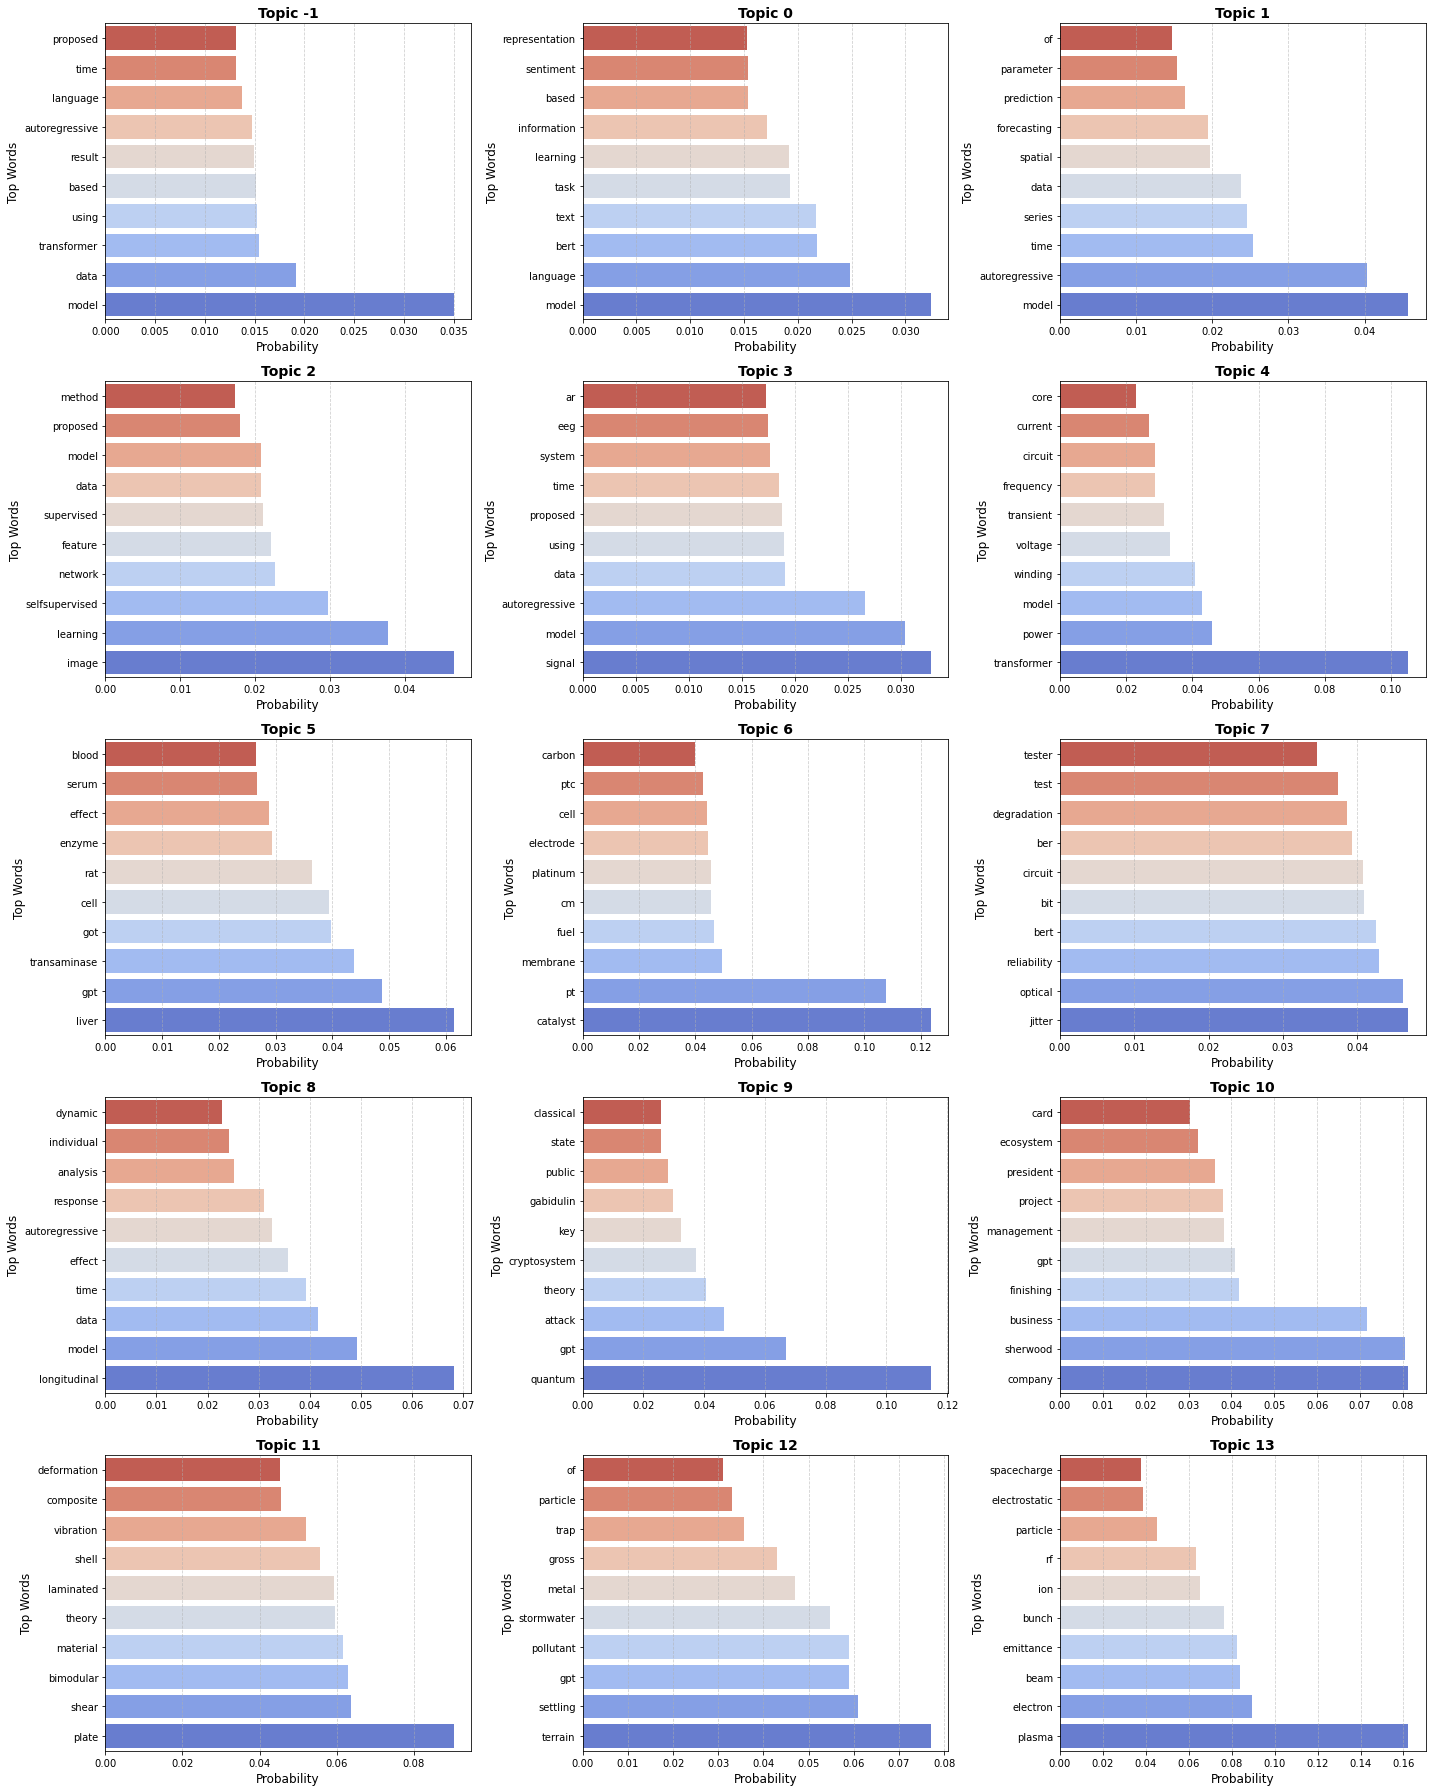

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Initialize an empty list to store the topic details
topic_data = []

# Step 2: Extract the top 15 topics (based on the topic occurrence count or another criterion)
top_15_topic_ids = topic_info['Topic'][:15]  # Get the top 15 topics from the topic_info dataframe

# Step 3: Loop over each of the top 15 topics and extract the details
for topic_id in top_15_topic_ids:
    topic_words = topic_model.get_topic(topic_id)  # Get the top words for this topic
    if topic_words:
        # Get the top 10 words and their probabilities for the current topic
        top_words = [word for word, score in topic_words[:10]]
        word_probs = [score for word, score in topic_words[:10]]
        
        # Append the topic details (topic number, top 10 words, word probabilities) to the list
        topic_data.append({
            'Topic ID': topic_id,
            'Top 10 Words': top_words,  # List of top words
            'Word Probabilities': word_probs  # List of word probabilities
        })

# Step 4: Create a plot for each topic
fig, axes = plt.subplots(5, 3, figsize=(20, 25))  # Create 5x3 grid for the top 15 topics
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Step 5: Plot each topic's top words and their probabilities
for i, topic in enumerate(topic_data):
    ax = axes[i]
    words = topic['Top 10 Words']
    probabilities = topic['Word Probabilities']
    
    # Create a horizontal bar plot with a Seaborn color palette
    sns.barplot(x=probabilities, y=words, ax=ax, palette=sns.color_palette("coolwarm", 10))
    
    # Customize the design for better aesthetics
    ax.set_title(f"Topic {topic['Topic ID']}", fontsize=14, fontweight='bold')
    ax.set_xlabel('Probability', fontsize=12)
    ax.set_ylabel('Top Words', fontsize=12)
    
    # Add gridlines for better readability
    ax.grid(True, which='both', axis='x', linestyle='--', alpha=0.6)
    
    # Invert the y-axis so that the highest probability word is at the top
    ax.invert_yaxis()

# Step 6: Adjust layout and show the plot
plt.tight_layout()
plt.show()


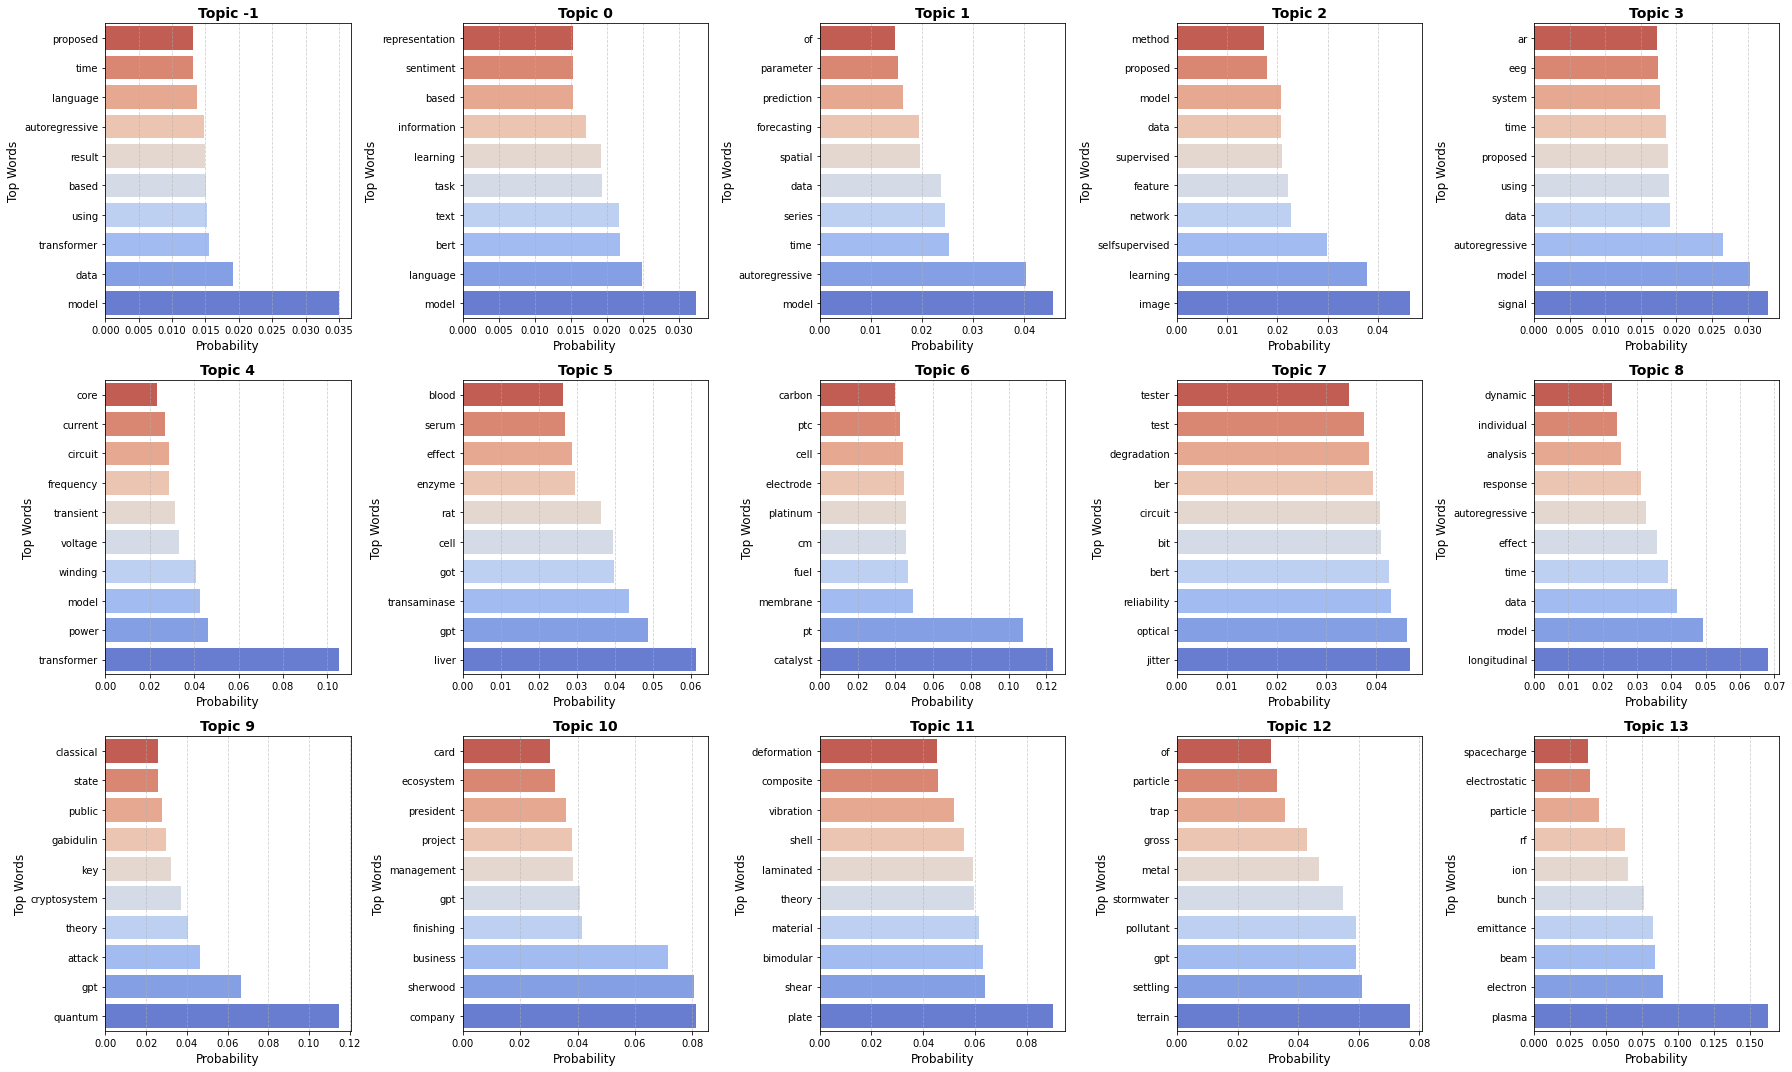

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Initialize an empty list to store the topic details
topic_data = []

# Step 2: Extract the top 15 topics (based on the topic occurrence count or another criterion)
top_15_topic_ids = topic_info['Topic'][:15]  # Get the top 15 topics from the topic_info dataframe

# Step 3: Loop over each of the top 15 topics and extract the details
for topic_id in top_15_topic_ids:
    topic_words = topic_model.get_topic(topic_id)  # Get the top words for this topic
    if topic_words:
        # Get the top 10 words and their probabilities for the current topic
        top_words = [word for word, score in topic_words[:10]]
        word_probs = [score for word, score in topic_words[:10]]
        
        # Append the topic details (topic number, top 10 words, word probabilities) to the list
        topic_data.append({
            'Topic ID': topic_id,
            'Top 10 Words': top_words,  # List of top words
            'Word Probabilities': word_probs  # List of word probabilities
        })

# Step 4: Create a plot for each topic in a landscape orientation (3 rows x 5 columns)
fig, axes = plt.subplots(3, 5, figsize=(25, 15))  # Create 3x5 grid for the top 15 topics (landscape format)
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Step 5: Plot each topic's top words and their probabilities
for i, topic in enumerate(topic_data):
    ax = axes[i]
    words = topic['Top 10 Words']
    probabilities = topic['Word Probabilities']
    
    # Create a horizontal bar plot with contrasting colors
    sns.barplot(x=probabilities, y=words, ax=ax, palette=sns.color_palette("coolwarm", 10))
    
    # Customize the design for better aesthetics
    ax.set_title(f"Topic {topic['Topic ID']}", fontsize=14, fontweight='bold')
    ax.set_xlabel('Probability', fontsize=12)
    ax.set_ylabel('Top Words', fontsize=12)
    
    # Add gridlines for better readability
    ax.grid(True, which='both', axis='x', linestyle='--', alpha=0.6)
    
    # Invert the y-axis so that the highest probability word is at the top
    ax.invert_yaxis()

# Step 6: Adjust layout and show the plot
plt.tight_layout()
plt.show()


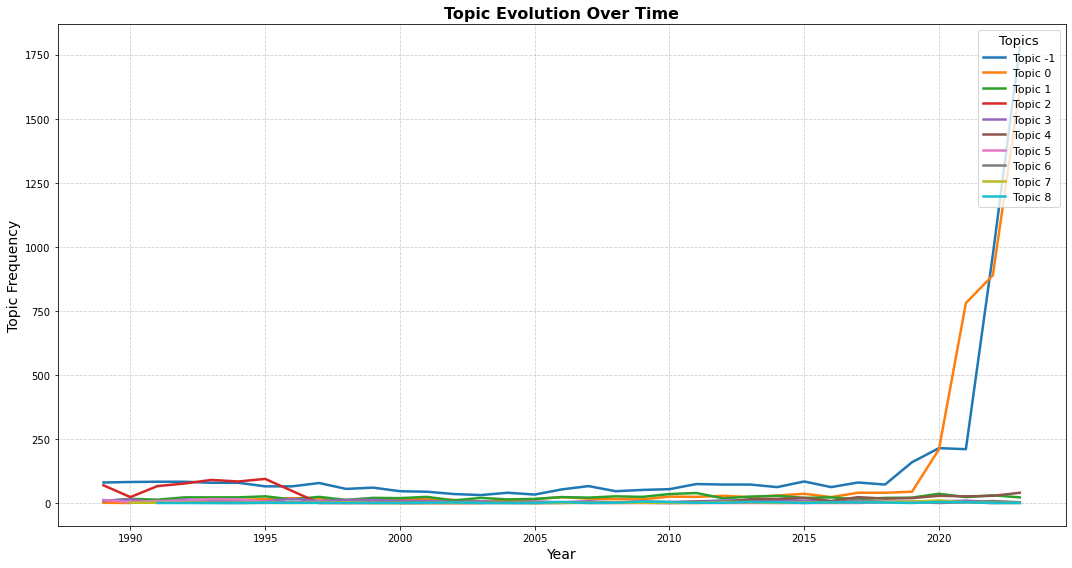

In [10]:
# Step 1: Extract topic evolution data over time using the Year column
topics_over_time = topic_model.topics_over_time(docs=documents_cleaned, topics=topics, timestamps=df_clean['Year'])

# Step 2: Customize the visualization with Seaborn and Matplotlib for enhanced aesthetics
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Plotting topic evolution over time for the top 10 topics
fig, ax = plt.subplots(figsize=(15, 8))

# Extract the top 10 topics from the topic_info dataframe
top_10_topic_ids = topic_info['Topic'][:10].tolist()

# Create a Seaborn line plot for each of the top 10 topics
for topic_id in top_10_topic_ids:
    # Filter the data for the current topic
    topic_data = topics_over_time[topics_over_time['Topic'] == topic_id]
    
    # Plot the evolution of the topic over time
    sns.lineplot(
        x='Timestamp', y='Frequency', data=topic_data,
        label=f"Topic {topic_id}", linewidth=2.5, ax=ax
    )

# Step 4: Customize the plot with titles, labels, and legend
plt.title('Topic Evolution Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Topic Frequency', fontsize=14)

# Customize the legend to display each topic's label
plt.legend(title='Topics', title_fontsize='13', fontsize='11', loc='upper right')

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', alpha=0.6)

# Step 5: Show the final plot
plt.tight_layout()
plt.show()


In [20]:
# Step 1: Check the lengths of each array to debug the mismatch
print(f"Length of documents_cleaned: {len(documents_cleaned)}")
print(f"Length of topics: {len(topics)}")
print(f"Length of filtered_timestamps: {len(filtered_timestamps)}")

# If there is a mismatch, we need to ensure consistent filtering between documents and timestamps


Length of documents_cleaned: 10539
Length of topics: 9677
Length of filtered_timestamps: 10539


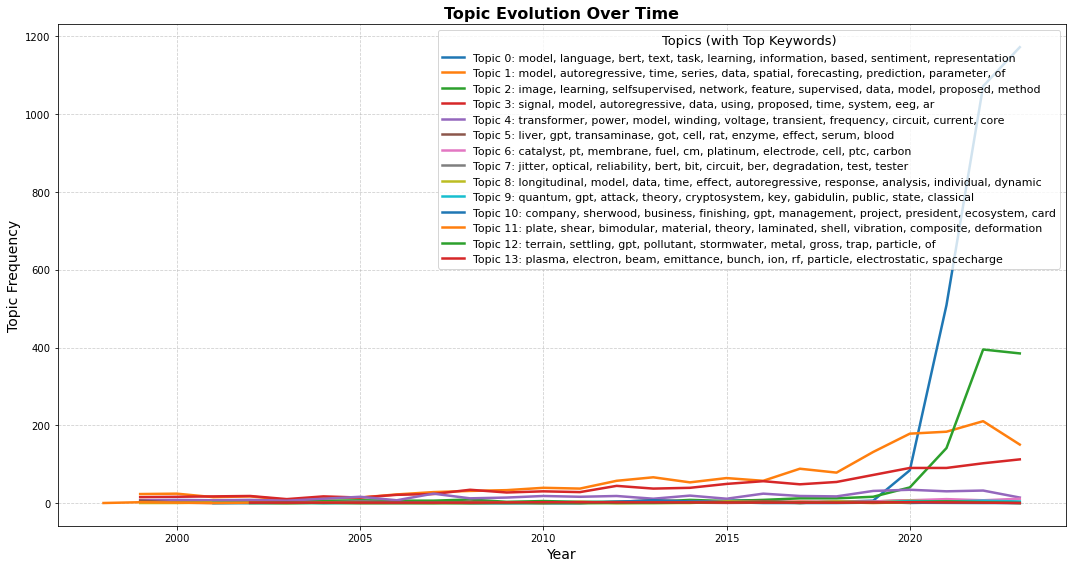

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare data for the top 15 topics
top_n_topics = 15  # Plot the top 15 topics
top_n_words = 10  # Plot the top 10 words per topic

# Create a color palette for the lines (15 distinct colors)
palette = sns.color_palette("tab15", top_n_topics)  # Adjusted for 15 topics

# Step 2: Initialize the plot
plt.figure(figsize=(12, 8))  # Set the figure size to be slightly larger for 15 topics

# Step 3: Loop through the top topics and plot the term rank vs. c-TF-IDF score
for i, topic_id in enumerate(topic_info.head(top_n_topics)['Topic']):
    # Extract the top words and their c-TF-IDF scores for the current topic
    topic_words = topic_model.get_topic(topic_id)
    
    # Prepare the term rank and scores
    num_words = min(top_n_words, len(topic_words))  # Ensure we don't exceed the number of available words
    ranks = list(range(1, num_words + 1))  # Term rank (1, 2, 3, ..., num_words)
    scores = [prob for _, prob in topic_words[:num_words]]  # c-TF-IDF scores
    
    # Plot the line for the current topic
    plt.plot(ranks, scores, label=f'Topic {topic_id}', color=palette[i], marker='o')

# Step 4: Add title, labels, and legend
plt.title('Term Score Decline per Topic', fontsize=16, fontweight='bold')
plt.xlabel('Term Rank', fontsize=12)
plt.ylabel('c-TF-IDF Score', fontsize=12)
plt.legend(title="Topics", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot

# Step 5: Display the plot
plt.tight_layout()
plt.show()


ValueError: tab15 is not a valid palette name

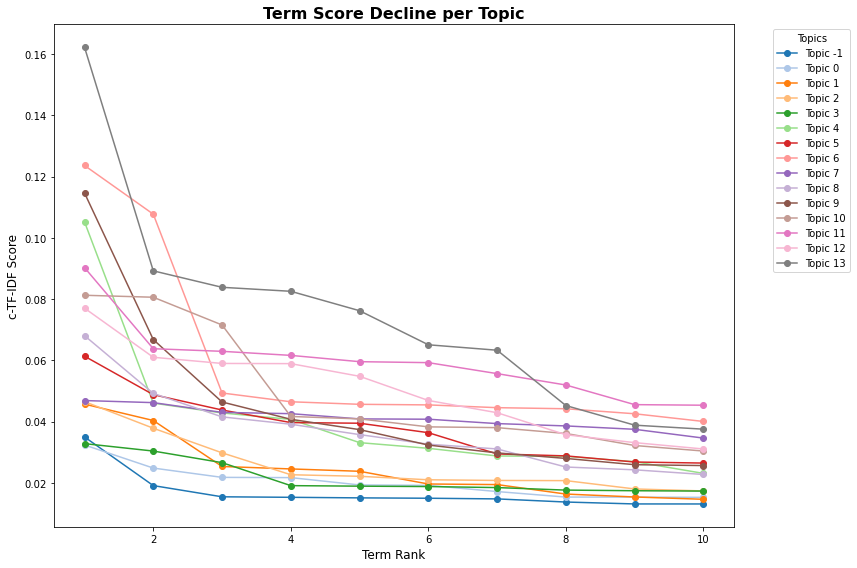

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare data for the top 15 topics
top_n_topics = 15  # Plot the top 15 topics
top_n_words = 10   # Plot the top 10 words per topic

# Create a color palette for the lines (15 distinct colors)
palette = sns.color_palette("tab20", top_n_topics)  # Adjust palette for 15 topics (tab20 provides more colors)

# Step 2: Initialize the plot
plt.figure(figsize=(12, 8))  # Set the figure size to be slightly larger for 15 topics

# Step 3: Loop through the top topics and plot the term rank vs. c-TF-IDF score
for i, topic_id in enumerate(topic_info.head(top_n_topics)['Topic']):
    # Extract the top words and their c-TF-IDF scores for the current topic
    topic_words = topic_model.get_topic(topic_id)
    
    # Prepare the term rank and scores
    num_words = min(top_n_words, len(topic_words))  # Ensure we don't exceed the number of available words
    ranks = list(range(1, num_words + 1))  # Term rank (1, 2, 3, ..., num_words)
    scores = [prob for _, prob in topic_words[:num_words]]  # c-TF-IDF scores
    
    # Plot the line for the current topic
    plt.plot(ranks, scores, label=f'Topic {topic_id}', color=palette[i], marker='o')
    
# Step 4: Add title, labels, and legend
plt.title('Term Score Decline per Topic', fontsize=16, fontweight='bold')
plt.xlabel('Term Rank', fontsize=12)
plt.ylabel('c-TF-IDF Score', fontsize=12)
plt.legend(title="Topics", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot

# Step 5: Display the plot
plt.tight_layout()
plt.show()


In [30]:
# Step 6: Visualize the topic relationships for the top topics using three methods

# Check the number of topics generated
topic_info = topic_model.get_topic_info()
n_generated_topics = len(topic_info[topic_info.Topic != -1])  # Exclude outliers (-1)

# Display the number of generated topics
print(f"Number of topics generated: {n_generated_topics}")

# Ensure we can reduce to at most the number of topics generated
nr_topics_to_reduce = min(n_generated_topics, 15)  # Set this to 15 topics now

# Step 1: Filter out documents that are outliers (i.e., assigned to topic -1)
valid_topics = [topic != -1 for topic in topic_model.topics_]  # Filter out topic -1
filtered_documents_cleaned = [doc for doc, valid in zip(documents_cleaned, valid_topics) if valid]
filtered_topics = [topic for topic in topic_model.topics_ if topic != -1]

# Step 2: Ensure the images argument is handled (if not used, set to None)
images = [None] * len(filtered_documents_cleaned)

# Check lengths of arrays for debugging
print(f"Filtered documents: {len(filtered_documents_cleaned)}, Topics: {len(filtered_topics)}, Images: {len(images)}")

# Step 3: Filter the model to only keep the top topics
# Now we use filtered documents, topics, and handle the images argument
topic_model_reduced = topic_model.reduce_topics(filtered_documents_cleaned, nr_topics=nr_topics_to_reduce, images=images)

# 1. Intertopic Distance Map for Top Topics
print(f"Visualizing the Intertopic Distance Map for Top {nr_topics_to_reduce} Topics...")
intertopic_distance_fig = topic_model_reduced.visualize_topics()
intertopic_distance_fig.update_layout(
    title=f"Intertopic Distance Map for Top {nr_topics_to_reduce} Topics",
    title_font_size=18,
    font=dict(size=12),
    width=900, height=600
)
intertopic_distance_fig.show()

# 2. Hierarchical Clustering of Top Topics
print(f"Visualizing Hierarchical Clustering of Top {nr_topics_to_reduce} Topics...")
hierarchical_clustering_fig = topic_model_reduced.visualize_hierarchy()
hierarchical_clustering_fig.update_layout(
    title=f"Hierarchical Clustering of Top {nr_topics_to_reduce} Topics",
    title_font_size=18,
    font=dict(size=12),
    width=900, height=600
)
hierarchical_clustering_fig.show()

# 3. Topic Similarity Matrix (Cosine Similarity Heatmap) for Top Topics
print(f"Visualizing the Topic Similarity Matrix for Top {nr_topics_to_reduce} Topics...")
similarity_matrix_fig = topic_model_reduced.visualize_heatmap()
similarity_matrix_fig.update_layout(
    title=f"Topic Similarity Matrix (Cosine Similarity) for Top {nr_topics_to_reduce} Topics",
    title_font_size=18,
    font=dict(size=12),
    width=900, height=600
)
similarity_matrix_fig.show()


Number of topics generated: 14
Filtered documents: 7560, Topics: 7560, Images: 7560


ValueError: arrays must all be same length

In [31]:
# Step 6: Visualize the topic relationships for the 14 generated topics using three methods

# Check the number of topics generated
topic_info = topic_model.get_topic_info()
n_generated_topics = len(topic_info[topic_info.Topic != -1])  # Exclude outliers (-1)

# Display the number of generated topics
print(f"Number of topics generated: {n_generated_topics}")

# Set nr_topics_to_reduce to 14 since 14 topics were generated
nr_topics_to_display = min(n_generated_topics, 14)  # Adjust this to 14

# Use the model directly without reducing topics, as we already have 14 topics
# No need to filter documents, just use the existing model for visualizations

# 1. Intertopic Distance Map for 14 Topics
print(f"Visualizing the Intertopic Distance Map for {nr_topics_to_display} Topics...")
intertopic_distance_fig = topic_model.visualize_topics()
intertopic_distance_fig.update_layout(
    title=f"Intertopic Distance Map for {nr_topics_to_display} Topics",
    title_font_size=18,
    font=dict(size=12),
    width=900, height=600
)
intertopic_distance_fig.show()

# 2. Hierarchical Clustering of 14 Topics
print(f"Visualizing Hierarchical Clustering of {nr_topics_to_display} Topics...")
hierarchical_clustering_fig = topic_model.visualize_hierarchy()
hierarchical_clustering_fig.update_layout(
    title=f"Hierarchical Clustering of {nr_topics_to_display} Topics",
    title_font_size=18,
    font=dict(size=12),
    width=900, height=600
)
hierarchical_clustering_fig.show()

# 3. Topic Similarity Matrix (Cosine Similarity Heatmap) for 14 Topics
print(f"Visualizing the Topic Similarity Matrix for {nr_topics_to_display} Topics...")
similarity_matrix_fig = topic_model.visualize_heatmap()
similarity_matrix_fig.update_layout(
    title=f"Topic Similarity Matrix (Cosine Similarity) for {nr_topics_to_display} Topics",
    title_font_size=18,
    font=dict(size=12),
    width=900, height=600
)
similarity_matrix_fig.show()


Number of topics generated: 14
Visualizing the Intertopic Distance Map for 14 Topics...


Visualizing Hierarchical Clustering of 14 Topics...


Visualizing the Topic Similarity Matrix for 14 Topics...


In [16]:
# Step 6: Visualize the topic relationships for the top topics using three methods

# Check the number of topics generated
topic_info = topic_model.get_topic_info()
n_generated_topics = len(topic_info[topic_info.Topic != -1])  # Exclude outliers (-1)

# Display the number of generated topics
print(f"Number of topics generated: {n_generated_topics}")

# Ensure we can reduce to at most the number of topics generated
nr_topics_to_reduce = min(n_generated_topics, 10)  # Choose the minimum between generated topics and 10

# Filter the model to only keep the top topics
# Use documents_cleaned instead of documents_processed if that's your variable for preprocessed documents
topic_model_reduced = topic_model.reduce_topics(documents_cleaned, nr_topics=nr_topics_to_reduce)

# 1. Intertopic Distance Map for Top Topics with Labels
print(f"Visualizing the Intertopic Distance Map for Top {nr_topics_to_reduce} Topics...")

# Visualize the Intertopic Distance Map with labels (interactive)
intertopic_distance_fig = topic_model_reduced.visualize_topics()

# The labels for topics are shown with the top words in this interactive plot
# You can add further styling if needed
intertopic_distance_fig.update_layout(
    title=f"Intertopic Distance Map with Labels for Top {nr_topics_to_reduce} Topics",
    title_font_size=18,
    font=dict(size=12),
    width=900, height=600
)

# Show the interactive plot
intertopic_distance_fig.show()



Number of topics generated: 9
Visualizing the Intertopic Distance Map for Top 9 Topics...


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Extract UMAP coordinates and top words for each topic
topic_info = topic_model.get_topic_info()

# Remove outlier topic (-1) and keep the top topics
topic_info = topic_info[topic_info.Topic != -1]
top_n_topics = 10  # Set the number of top topics to display

# Extract the UMAP coordinates for topics
umap_coords = topic_model.topic_vectors_[:, :2]

# Step 2: Get top words for each topic
top_n_words = 5  # Number of words to display for each topic
topic_labels = []
for topic_id in topic_info['Topic'][:top_n_topics]:
    top_words = topic_model.get_topic(topic_id)
    words = ", ".join([word for word, _ in top_words[:top_n_words]])
    topic_labels.append(words)

# Step 3: Plot the topics using UMAP coordinates
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_coords[:, 0], y=umap_coords[:, 1], s=100, color="skyblue", edgecolor="black")

# Step 4: Add the top words as permanent labels for each topic
for i, topic_id in enumerate(topic_info['Topic'][:top_n_topics]):
    plt.text(umap_coords[i, 0], umap_coords[i, 1], topic_labels[i],
             horizontalalignment='center', verticalalignment='center',
             fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

# Step 5: Customize plot
plt.title(f'Intertopic Distance Map with Labels for Top {top_n_topics} Topics', fontsize=16, fontweight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


AttributeError: 'BERTopic' object has no attribute 'topic_vectors_'

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Extract UMAP coordinates and top words for each topic
# Use topic_model.get_topic_info() to get the topic details
topic_info = topic_model.get_topic_info()

# Remove the outlier topic (-1) and keep the top topics
topic_info = topic_info[topic_info.Topic != -1]
top_n_topics = 10  # Set the number of top topics to display

# Step 2: Get the UMAP embeddings for topics directly from BERTopic
# Use BERTopic's reduce_dimensionality() to get UMAP coordinates
umap_model = topic_model.umap_model  # Get the UMAP model used in BERTopic
umap_embeddings = umap_model.fit_transform(topic_model.c_tf_idf_)

# Step 3: Get the top words for each topic
top_n_words = 5  # Number of words to display for each topic
topic_labels = []
for topic_id in topic_info['Topic'][:top_n_topics]:
    top_words = topic_model.get_topic(topic_id)
    words = ", ".join([word for word, _ in top_words[:top_n_words]])
    topic_labels.append(words)

# Step 4: Plot the topics using UMAP embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], s=100, color="skyblue", edgecolor="black")

# Step 5: Add the top words as permanent labels for each topic
for i, topic_id in enumerate(topic_info['Topic'][:top_n_topics]):
    plt.text(umap_embeddings[i, 0], umap_embeddings[i, 1], topic_labels[i],
             horizontalalignment='center', verticalalignment='center',
             fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

# Step 6: Customize plot
plt.title(f'Intertopic Distance Map with Labels for Top {top_n_topics} Topics', fontsize=16, fontweight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\lenovo\anaconda3\envs\nlpcourse\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1595: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.



TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Extract UMAP coordinates and top words for each topic
# Use topic_model.get_topic_info() to get the topic details
topic_info = topic_model.get_topic_info()

# Remove the outlier topic (-1) and keep the top topics
topic_info = topic_info[topic_info.Topic != -1]
top_n_topics = 10  # Set the number of top topics to display

# Step 2: Get the UMAP embeddings for topics directly from BERTopic
# Convert the sparse c-TF-IDF matrix to a dense matrix
dense_c_tf_idf = topic_model.c_tf_idf_.toarray()

# Apply UMAP on the dense matrix
umap_model = topic_model.umap_model  # Get the UMAP model used in BERTopic
umap_embeddings = umap_model.fit_transform(dense_c_tf_idf)

# Step 3: Get the top words for each topic
top_n_words = 5  # Number of words to display for each topic
topic_labels = []
for topic_id in topic_info['Topic'][:top_n_topics]:
    top_words = topic_model.get_topic(topic_id)
    words = ", ".join([word for word, _ in top_words[:top_n_words]])
    topic_labels.append(words)

# Step 4: Plot the topics using UMAP embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], s=100, color="skyblue", edgecolor="black")

# Step 5: Add the top words as permanent labels for each topic
for i, topic_id in enumerate(topic_info['Topic'][:top_n_topics]):
    plt.text(umap_embeddings[i, 0], umap_embeddings[i, 1], topic_labels[i],
             horizontalalignment='center', verticalalignment='center',
             fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

# Step 6: Customize plot
plt.title(f'Intertopic Distance Map with Labels for Top {top_n_topics} Topics', fontsize=16, fontweight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\lenovo\anaconda3\envs\nlpcourse\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1595: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.



TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Extract UMAP coordinates and top words for each topic
# Use topic_model.get_topic_info() to get the topic details
topic_info = topic_model.get_topic_info()

# Remove the outlier topic (-1) and keep the top topics
topic_info = topic_info[topic_info.Topic != -1]
top_n_topics = 10  # Set the number of top topics to display

# Step 2: Get the UMAP embeddings for topics directly from BERTopic
# Convert the sparse c-TF-IDF matrix to a dense matrix
dense_c_tf_idf = topic_model.c_tf_idf_.toarray()

# Apply UMAP on the dense matrix
umap_model = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)  # Reduce dimensionality
umap_embeddings = umap_model.fit_transform(dense_c_tf_idf)

# Step 3: Get the top words for each topic
top_n_words = 5  # Number of words to display for each topic
topic_labels = []
for topic_id in topic_info['Topic'][:top_n_topics]:
    top_words = topic_model.get_topic(topic_id)
    words = ", ".join([word for word, _ in top_words[:top_n_words]])
    topic_labels.append(words)

# Step 4: Plot the topics using UMAP embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], s=100, color="skyblue", edgecolor="black")

# Step 5: Add the top words as permanent labels for each topic
for i, topic_id in enumerate(topic_info['Topic'][:top_n_topics]):
    plt.text(umap_embeddings[i, 0], umap_embeddings[i, 1], topic_labels[i],


SyntaxError: unexpected EOF while parsing (<ipython-input-20-19c5193ab4a5>, line 35)

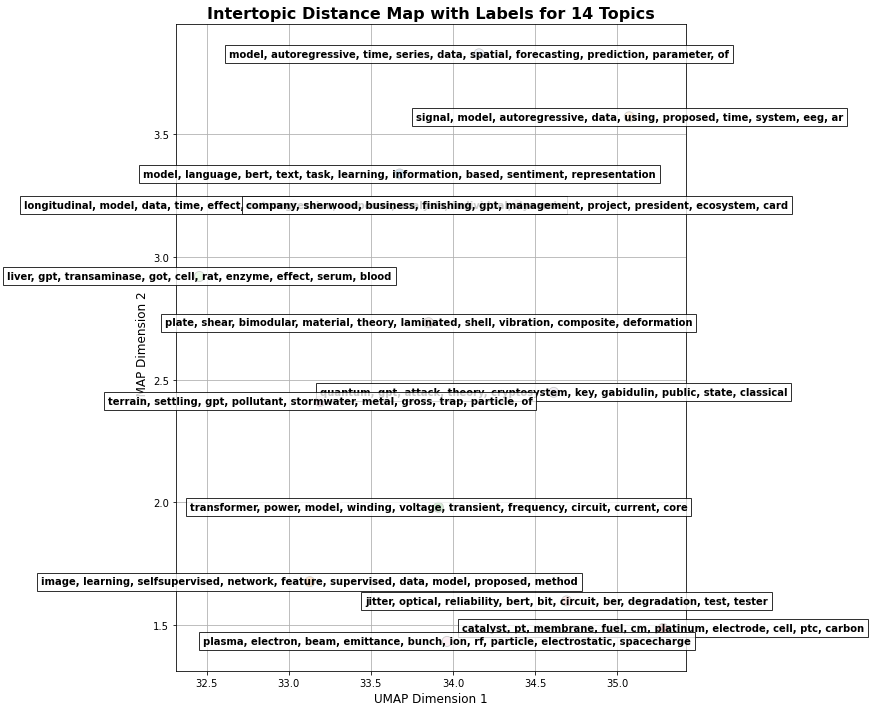

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from umap import UMAP

# Step 1: Extract UMAP coordinates and top words for each topic
# Use topic_model.get_topic_info() to get the topic details
topic_info = topic_model.get_topic_info()

# Remove the outlier topic (-1) and keep the generated topics
topic_info = topic_info[topic_info.Topic != -1]
top_n_topics = len(topic_info)  # Adjust to the number of topics generated, in this case 14

# Step 2: Get the UMAP embeddings for topics directly from BERTopic
# Convert the sparse c-TF-IDF matrix to a dense matrix
dense_c_tf_idf = topic_model.c_tf_idf_.toarray()

# Apply UMAP on the dense matrix
umap_model = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)  # Reduce dimensionality
umap_embeddings = umap_model.fit_transform(dense_c_tf_idf)

# Step 3: Get the top 10 words for each topic
top_n_words = 10  # Number of words to display for each topic
topic_labels = []
for topic_id in topic_info['Topic'][:top_n_topics]:
    top_words = topic_model.get_topic(topic_id)
    words = ", ".join([word for word, _ in top_words[:top_n_words]])  # Get the top 10 words
    topic_labels.append(words)

# Step 4: Plot the topics using UMAP embeddings
plt.figure(figsize=(12, 10))

# Use a color palette for better distinction between topics
palette = sns.color_palette("tab20", top_n_topics)  # Using "tab20" for the generated number of topics

# Scatter plot for UMAP embeddings
sns.scatterplot(
    x=umap_embeddings[:top_n_topics, 0], 
    y=umap_embeddings[:top_n_topics, 1], 
    s=100, 
    hue=topic_info['Topic'][:top_n_topics],
    palette=palette, 
    edgecolor="black", 
    legend=False
)

# Step 5: Add the top words as permanent labels for each topic
for i, topic_id in enumerate(topic_info['Topic'][:top_n_topics]):
    plt.text(
        umap_embeddings[i, 0], umap_embeddings[i, 1], topic_labels[i],
        horizontalalignment='center', verticalalignment='center',
        fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
    )

# Step 6: Customize plot
plt.title(f'Intertopic Distance Map with Labels for {top_n_topics} Topics', fontsize=16, fontweight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [22]:
# Step 1: Visualize Hierarchical Clustering of Top Topics
print(f"Visualizing Hierarchical Clustering of Top {nr_topics_to_reduce} Topics...")

# Generate the hierarchical clustering map
hierarchical_clustering_fig = topic_model_reduced.visualize_hierarchy()

# Step 2: Customize the layout and appearance of the dendrogram
hierarchical_clustering_fig.update_layout(
    title=f"Hierarchical Clustering of Top {nr_topics_to_reduce} Topics",
    title_font_size=18,  # Make the title larger
    font=dict(size=12),  # Set a default font size
    width=1200,  # Increase the width of the plot for better readability
    height=800,  # Increase the height for better visualization
    margin=dict(l=50, r=50, t=100, b=50),  # Adjust margins
    paper_bgcolor="white",  # Set background to white for better clarity
    plot_bgcolor="white",  # Set plot background to white
)

# Display the improved hierarchical clustering map
hierarchical_clustering_fig.show()


Visualizing Hierarchical Clustering of Top 9 Topics...


In [23]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Step 1: Extract UMAP embeddings and topic labels
# Get the dense matrix of topic embeddings from BERTopic
dense_c_tf_idf = topic_model.c_tf_idf_.toarray()

# Get the topic labels (e.g., top words)
top_n_words = 5  # Number of words to display for each topic
topic_labels = []
for topic_id in topic_info['Topic'][:10]:  # Top 10 topics for demonstration
    top_words = topic_model.get_topic(topic_id)
    words = ", ".join([word for word, _ in top_words[:top_n_words]])
    topic_labels.append(words)

# Step 2: Perform hierarchical clustering using Scipy's linkage function
Z = linkage(dense_c_tf_idf, method='ward')

# Step 3: Plot the dendrogram and add topic labels
plt.figure(figsize=(12, 8))  # Set the figure size
dendrogram(
    Z,
    labels=topic_labels,  # Use topic labels as the dendrogram labels
    leaf_rotation=90,  # Rotate the labels for better readability
    leaf_font_size=10,  # Font size for the labels
    color_threshold=0.7 * np.max(Z[:, 2]),  # Color threshold for clusters
    above_threshold_color='gray'  # Color for non-clustered labels
)

# Step 4: Customize the plot
plt.title('Hierarchical Clustering of Topics with Labels', fontsize=16, fontweight='bold')
plt.xlabel('Topics', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()

# Show the dendrogram with permanent labels
plt.show()


ValueError: Dimensions of Z and labels must be consistent.

<Figure size 864x576 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Step 1: Extract UMAP embeddings and topic labels
# Get the dense matrix of topic embeddings from BERTopic
dense_c_tf_idf = topic_model.c_tf_idf_.toarray()

# Get the topic labels (e.g., top words)
top_n_words = 5  # Number of words to display for each topic
topic_labels = []
for topic_id in topic_info['Topic']:  # Get labels for ALL topics, not just the top 10
    top_words = topic_model.get_topic(topic_id)
    words = ", ".join([word for word, _ in top_words[:top_n_words]])
    topic_labels.append(words)

# Ensure that the number of labels matches the number of topics
assert len(topic_labels) == len(dense_c_tf_idf), "Number of labels must match the number of topics!"

# Step 2: Perform hierarchical clustering using Scipy's linkage function
Z = linkage(dense_c_tf_idf, method='ward')

# Step 3: Plot the dendrogram and add topic labels
plt.figure(figsize=(12, 8))  # Set the figure size
dendrogram(
    Z,
    labels=topic_


SyntaxError: unexpected EOF while parsing (<ipython-input-24-2d0336f0bba2>, line 27)

In [25]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Step 1: Extract UMAP embeddings and topic labels
# Get the dense matrix of topic embeddings from BERTopic
dense_c_tf_idf = topic_model.c_tf_idf_.toarray()

# Get the topic labels (e.g., top words)
top_n_words = 5  # Number of words to display for each topic
topic_labels = []
for topic_id in topic_info['Topic']:  # Get labels for ALL topics, not just the top 10
    top_words = topic_model.get_topic(topic_id)
    words = ", ".join([word for word, _ in top_words[:top_n_words]])
    topic_labels.append(words)

# Ensure that the number of labels matches the number of topics
assert len(topic_labels) == len(dense_c_tf_idf), "Number of labels must match the number of topics!"

# Step 2: Perform hierarchical clustering using Scipy's linkage function
Z = linkage(dense_c_tf_idf, method='ward')

# Step 3: Plot the dendrogram and add topic labels
plt.figure(figsize=(12, 8))  # Set the figure size
dendrogram(
    Z,
    labels=topic_labels,  # Use topic labels as the dendrogram labels
    leaf_rotation=90,  # Rotate the labels for better readability
    leaf_font_size=10,  # Font size for the labels
    color_threshold=0.7 * np.max(Z[:, 2]),  # Color threshold for clusters
    above_threshold_color='gray'  # Color for non-clustered labels
)

# Step 4: Customize the plot
plt.title('Hierarchical Clustering of Topics with Labels', fontsize=16, fontweight='bold')
plt.xlabel('Topics', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()

# Show the dendrogram with permanent labels
plt.show()


AssertionError: Number of labels must match the number of topics!

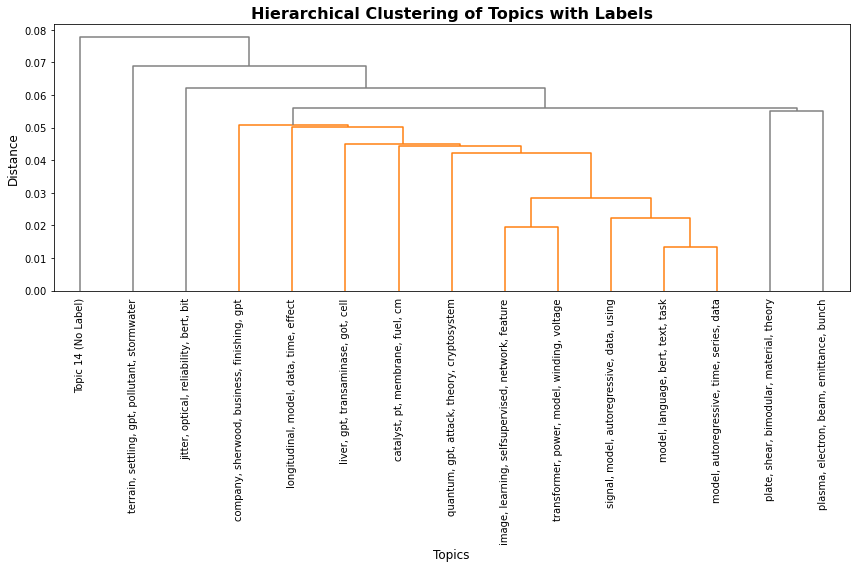

In [34]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Step 1: Get the number of topics
n_topics = dense_c_tf_idf.shape[0]  # Number of topics based on the c-TF-IDF matrix

# Step 2: Generate topic labels for all topics, including potential outliers
top_n_words = 5  # Number of words to display for each topic
topic_labels = []

for topic_id in range(n_topics):
    if topic_id in topic_info['Topic'].values:
        # If the topic exists, get its top words
        top_words = topic_model.get_topic(topic_id)
        words = ", ".join([word for word, _ in top_words[:top_n_words]])
        topic_labels.append(words)
    else:
        # For outliers or missing topics, add a default label
        topic_labels.append(f"Topic {topic_id} (No Label)")

# Ensure that the number of labels matches the number of topics
assert len(topic_labels) == len(dense_c_tf_idf), "Number of labels must match the number of topics!"

# Step 3: Perform hierarchical clustering using Scipy's linkage function
Z = linkage(dense_c_tf_idf, method='ward')  # Using Ward's method for clustering

# Step 4: Plot the dendrogram and add topic labels
plt.figure(figsize=(12, 8))  # Set the figure size
dendrogram(
    Z,
    labels=topic_labels,  # Use topic labels as the dendrogram labels
    leaf_rotation=90,  # Rotate the labels for better readability
    leaf_font_size=10,  # Font size for the labels
    color_threshold=0.7 * np.max(Z[:, 2]),  # Color threshold for clusters
    above_threshold_color='gray'  # Color for non-clustered labels
)

# Step 5: Customize the plot
plt.title('Hierarchical Clustering of Topics with Labels', fontsize=16, fontweight='bold')
plt.xlabel('Topics', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()

# Show the dendrogram with permanent labels
plt.show()


In [27]:
# Step 1: Get the topic information
topic_info = topic_model.get_topic_info()

# Step 2: Select the top 10 topics (excluding outlier topic -1 if present)
top_n_topics = 10
top_topics = topic_info[topic_info.Topic != -1].head(top_n_topics)

# Step 3: Prepare to display information for each topic
print(f"Displaying information for the top {top_n_topics} topics:\n")

for _, row in top_topics.iterrows():
    topic_id = row['Topic']  # Get the topic ID
    topic_count = row['Count']  # Number of documents in the topic
    topic_name = row['Name']  # Short topic name
    
    # Step 4: Get the top 6 words for this topic
    top_words = topic_model.get_topic(topic_id)
    top_words_display = ", ".join([f"{word} ({round(score, 4)})" for word, score in top_words[:6]])
    
    # Display the topic information
    print(f"Topic {topic_id}: {topic_name}")
    print(f"  - Document Count: {topic_count}")
    print(f"  - Top 6 Words: {top_words_display}\n")

# Step 5: Optional - You can save the output to a file or table if needed


Displaying information for the top 10 topics:

Topic 0: 0_transformer_model_language_learning
  - Document Count: 4100
  - Top 6 Words: transformer (0.0332), model (0.0304), language (0.0218), learning (0.0202), data (0.0196), using (0.0194)

Topic 1: 1_of_patient_effect_case
  - Document Count: 2230
  - Top 6 Words: of (0.0246), patient (0.0246), effect (0.0233), case (0.0231), liver (0.023), clinical (0.0222)

Topic 2: 2_catalyst_pt_fuel_surface
  - Document Count: 321
  - Top 6 Words: catalyst (0.0973), pt (0.0931), fuel (0.0382), surface (0.0382), electrode (0.034), reaction (0.0336)

Topic 3: 3_neutron_plasma_perturbation_sensitivity
  - Document Count: 159
  - Top 6 Words: neutron (0.0394), plasma (0.0364), perturbation (0.0352), sensitivity (0.0334), calculation (0.0327), energy (0.0298)

Topic 4: 4_ict_tour_technology_gpts
  - Document Count: 84
  - Top 6 Words: ict (0.0652), tour (0.0648), technology (0.0568), gpts (0.0465), general (0.0443), growth (0.0438)

Topic 5: 5_quantu

In [28]:
# Step 1: Get the topic information, excluding the outlier topic (-1)
topic_info = topic_model.get_topic_info()

# Step 2: Dynamically determine how many topics were generated (excluding outliers)
n_generated_topics = len(topic_info[topic_info.Topic != -1])  # Exclude outliers
top_n_topics = min(n_generated_topics, 10)  # Display up to 10 topics, or fewer if fewer exist

print(f"Displaying information for the top {top_n_topics} topics:\n")

# Step 3: Select the top topics (limit to top_n_topics)
top_topics = topic_info[topic_info.Topic != -1].head(top_n_topics)

# Step 4: Display information for each topic
for _, row in top_topics.iterrows():
    topic_id = row['Topic']  # Get the topic ID
    topic_count = row['Count']  # Number of documents in the topic
    topic_name = row['Name']  # Short topic name
    
    # Step 5: Get the top 6 words for this topic
    top_words = topic_model.get_topic(topic_id)
    top_words_display = ", ".join([f"{word} ({round(score, 4)})" for word, score in top_words[:6]])
    
    # Display the topic information
    print(f"Topic {topic_id}: {topic_name}")
    print(f"  - Document Count: {topic_count}")
    print(f"  - Top 6 Words: {top_words_display}\n")


Displaying information for the top 8 topics:

Topic 0: 0_transformer_model_language_learning
  - Document Count: 4100
  - Top 6 Words: transformer (0.0332), model (0.0304), language (0.0218), learning (0.0202), data (0.0196), using (0.0194)

Topic 1: 1_of_patient_effect_case
  - Document Count: 2230
  - Top 6 Words: of (0.0246), patient (0.0246), effect (0.0233), case (0.0231), liver (0.023), clinical (0.0222)

Topic 2: 2_catalyst_pt_fuel_surface
  - Document Count: 321
  - Top 6 Words: catalyst (0.0973), pt (0.0931), fuel (0.0382), surface (0.0382), electrode (0.034), reaction (0.0336)

Topic 3: 3_neutron_plasma_perturbation_sensitivity
  - Document Count: 159
  - Top 6 Words: neutron (0.0394), plasma (0.0364), perturbation (0.0352), sensitivity (0.0334), calculation (0.0327), energy (0.0298)

Topic 4: 4_ict_tour_technology_gpts
  - Document Count: 84
  - Top 6 Words: ict (0.0652), tour (0.0648), technology (0.0568), gpts (0.0465), general (0.0443), growth (0.0438)

Topic 5: 5_quantum

In [35]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report

# Step 1: Get all topics with their keywords and probabilities
topic_info = topic_model.get_topic_info()  # Get topic info including frequencies
all_topics = topic_info['Topic'].tolist()  # List of all topics
topics_with_keywords = {}

# Get all topics with their keywords and top probabilities
for topic_id in all_topics:
    if topic_id != -1:  # Exclude the outlier topic (-1)
        topic_words = topic_model.get_topic(topic_id)
        topics_with_keywords[topic_id] = [(word, prob) for word, prob in topic_words]

# Step 2: Retrieve document-topic probabilities
# For each document, get the topic probabilities
topic_probabilities = topic_model.get_probabilities(documents_cleaned)

# Create a DataFrame to store topic probabilities
df_topic_probabilities = pd.DataFrame(topic_probabilities, columns=[f'Topic {topic_id}' for topic_id in all_topics if topic_id != -1])

# Step 3: Silhouette score (evaluation metric for clustering)
# Calculate the silhouette score if embeddings are available
if 'embeddings' in locals():  # Assuming embeddings were used for topic modeling
    silhouette_avg = silhouette_score(embeddings, topic_model.topics_)
    print(f'Silhouette Score: {silhouette_avg}')

# Step 4: Get Topic Coherence score
coherence_score = topic_model.get_coherence_score()
print(f'Topic Coherence Score: {coherence_score}')

# Step 5: Evaluate the model with accuracy, precision, recall, and f1-score (if ground truth labels are available)
# If you have true labels, you can calculate metrics like accuracy, precision, recall, f1-score
# Assuming `true_labels` contains the actual topic or class labels for the documents
if 'true_labels' in locals():  # Assuming true_labels is available
    predicted_topics = topic_model.topics_
    report = classification_report(true_labels, predicted_topics, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    # Print the evaluation metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1_score:.4f}')

# Step 6: Display all topics with their keywords and probabilities
for topic_id, words in topics_with_keywords.items():
    print(f"Topic {topic_id}:")
    for word, prob in words:
        print(f"  {word}: {prob:.4f}")
    print("\n")


AttributeError: 'BERTopic' object has no attribute 'get_probabilities'

In [36]:
import pandas as pd
from bertopic import BERTopic
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 1: Initialize BERTopic with calculate_probabilities=True
topic_model = BERTopic(calculate_probabilities=True)

# Step 2: Fit the model with your documents (assumes documents_cleaned is your preprocessed documents)
documents_cleaned = ["document 1 content", "document 2 content", "..."]  # Replace with your actual cleaned documents
topic_model.fit(documents_cleaned)

# Step 3: Get topic assignments and probabilities for each document
topics, probabilities = topic_model.transform(documents_cleaned)  # Get topic assignments and probabilities

# Step 4: Get all topics with their keywords
topic_info = topic_model.get_topic_info()  # Get topic info
all_topics = topic_info['Topic'].tolist()  # List of all topics

topics_with_keywords = {}
for topic_id in all_topics:
    if topic_id != -1:  # Exclude the outlier topic (-1)
        topic_words = topic_model.get_topic(topic_id)
        topics_with_keywords[topic_id] = [(word, prob) for word, prob in topic_words]

# Step 5: Store topic probabilities in a DataFrame
df_topic_probabilities = pd.DataFrame(probabilities, columns=[f'Topic {topic_id}' for topic_id in all_topics if topic_id != -1])

# Step 6: Silhouette Score (if embeddings are available)
# Calculate silhouette score to evaluate clustering performance
if 'embeddings' in locals():  # Assuming embeddings were used
    silhouette_avg = silhouette_score(embeddings, topics)
    print(f'Silhouette Score: {silhouette_avg}')

# Step 7: Coherence Score
coherence_score = topic_model.get_coherence_score()
print(f'Topic Coherence Score: {coherence_score}')

# Step 8: Display all topics with their keywords and probabilities
for topic_id, words in topics_with_keywords.items():
    print(f"Topic {topic_id}:")
    for word, prob in words:
        print(f"  {word}: {prob:.4f}")
    print("\n")

# Step 9: Hierarchical Clustering and Dendrogram
# Perform hierarchical clustering using Scipy's linkage function
dense_c_tf_idf = topic_model.c_tf_idf_.toarray()
Z = linkage(dense_c_tf_idf, method='ward')  # Using Ward's method for clustering

# Plot the dendrogram and add topic labels
plt.figure(figsize=(12, 8))  # Set the figure size
dendrogram(
    Z,
    labels=[f'Topic {i}' for i in range(len(dense_c_tf_idf))],  # Label with topic ids
    leaf_rotation=90,  # Rotate the labels for better readability
    leaf_font_size=10,  # Font size for the labels
    color_threshold=0.7 * np.max(Z[:, 2]),  # Color threshold for clusters
    above_threshold_color='gray'  # Color for non-clustered labels
)

# Customize the dendrogram plot
plt.title('Hierarchical Clustering of Topics', fontsize=16, fontweight='bold')
plt.xlabel('Topics', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()
plt.show()

# Step 10: Display the topic probabilities DataFrame
print(df_topic_probabilities.head())


C:\Users\lenovo\anaconda3\envs\nlpcourse\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1595: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.

C:\Users\lenovo\anaconda3\envs\nlpcourse\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1595: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.



TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

In [37]:
import pandas as pd
from bertopic import BERTopic

# Step 1: Initialize BERTopic with calculate_probabilities=True
topic_model = BERTopic(calculate_probabilities=True)

# Step 2: Fit the model with your documents (replace 'documents_cleaned' with your actual documents)
documents_cleaned = ["document 1 content", "document 2 content", "..."]  # Example list, replace with your actual documents
topic_model.fit(documents_cleaned)

# Step 3: Get topic assignments and probabilities for each document
topics, probabilities = topic_model.transform(documents_cleaned)  # Get topic assignments and probabilities

# Step 4: Get all topics with their top keywords
topic_info = topic_model.get_topic_info()  # Get topic info
all_topics = topic_info['Topic'].tolist()  # List of all topics

topics_with_keywords = {}

# Step 5: Extract top topics with their top 10 keywords
top_n_words = 10  # Number of words to display for each topic
for topic_id in all_topics:
    if topic_id != -1:  # Exclude the outlier topic (-1)
        topic_words = topic_model.get_topic(topic_id)
        topics_with_keywords[topic_id] = [(word, prob) for word, prob in topic_words[:top_n_words]]

# Step 6: Display top topics with their keywords
print("Top Topics and Keywords:")
for topic_id, words in topics_with_keywords.items():
    print(f"\nTopic {topic_id}:")
    for word, prob in words:
        print(f"  {word}: {prob:.4f}")

# Step 7: Store topic probabilities in a DataFrame for further analysis
df_topic_probabilities = pd.DataFrame(probabilities, columns=[f'Topic {topic_id}' for topic_id in all_topics if topic_id != -1])

# Display the first few rows of topic probabilities
print("\nDocument-Topic Probabilities (First 5 Documents):")
print(df_topic_probabilities.head())


C:\Users\lenovo\anaconda3\envs\nlpcourse\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1595: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.

C:\Users\lenovo\anaconda3\envs\nlpcourse\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1595: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.



TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

In [38]:
import pandas as pd

# Step 1: Initialize an empty list to store the topic details
topic_data = []

# Step 2: Extract the top 15 topics (based on the topic occurrence count or another criterion)
top_15_topic_ids = topic_info['Topic'][:15]  # Get the top 15 topics from the topic_info dataframe

# Step 3: Loop over each of the top 15 topics and extract the details
for topic_id in top_15_topic_ids:
    topic_words = topic_model.get_topic(topic_id)  # Get the top words for this topic
    if topic_words:
        # Get the top 6 words and their probabilities for the current topic
        top_words = [word for word, score in topic_words[:10]]
        word_probs = [f"{score:.4f}" for word, score in topic_words[:10]]
        
        # Append the topic details (topic number, top 6 words, word probabilities) to the list
        topic_data.append({
            'Topic ID': topic_id,
            'Top 10 Words': ', '.join(top_words),  # Join the top words as a comma-separated string
            'Word Probabilities': ', '.join(word_probs)  # Join the word probabilities as a comma-separated string
        })

# Step 4: Convert the list of topic details to a DataFrame
topic_df = pd.DataFrame(topic_data)

# Step 5: Display the DataFrame containing the top 10 topics with their words and probabilities
topic_df

ValueError: This BERTopic instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [39]:
import pandas as pd
from bertopic import BERTopic

# Step 1: Initialize BERTopic with calculate_probabilities=True
topic_model = BERTopic(calculate_probabilities=True)

# Step 2: Fit the model with your documents (replace 'documents_cleaned' with your actual documents)
documents_cleaned = ["Document content 1", "Document content 2", "..."]  # Replace with your actual documents
topic_model.fit(documents_cleaned)

# Step 3: Initialize an empty list to store the topic details
topic_data = []

# Step 4: Extract the top 15 topics (based on the topic occurrence count or another criterion)
topic_info = topic_model.get_topic_info()  # Ensure we have the topic info after fitting the model
top_15_topic_ids = topic_info['Topic'][:15]  # Get the top 15 topics from the topic_info dataframe

# Step 5: Loop over each of the top 15 topics and extract the details
for topic_id in top_15_topic_ids:
    topic_words = topic_model.get_topic(topic_id)  # Get the top words for this topic
    if topic_words:
        # Get the top 10 words and their probabilities for the current topic
        top_words = [word for word, score in topic_words[:10]]
        word_probs = [f"{score:.4f}" for word, score in topic_words[:10]]
        
        # Append the topic details (topic number, top 10 words, word probabilities) to the list
        topic_data.append({
            'Topic ID': topic_id,
            'Top 10 Words': ', '.join(top_words),  # Join the top words as a comma-separated string
            'Word Probabilities': ', '.join(word_probs)  # Join the word probabilities as a comma-separated string
        })

# Step 6: Convert the list of topic details to a DataFrame
topic_df = pd.DataFrame(topic_data)

# Step 7: Display the DataFrame containing the top 10 topics with their words and probabilities
print(topic_df)


C:\Users\lenovo\anaconda3\envs\nlpcourse\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1595: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.

C:\Users\lenovo\anaconda3\envs\nlpcourse\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1595: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.



TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

In [40]:
import pandas as pd
from bertopic import BERTopic
from umap import UMAP

# Step 1: Initialize UMAP with fewer components and neighbors
# This helps to avoid the k >= N issue in small datasets
umap_model = UMAP(n_neighbors=5, n_components=2, min_dist=0.1, metric='cosine', random_state=42)

# Step 2: Initialize BERTopic with the modified UMAP model and calculate_probabilities=True
topic_model = BERTopic(umap_model=umap_model, calculate_probabilities=True)

# Step 3: Fit the model with your documents (replace 'documents_cleaned' with your actual documents)
documents_cleaned = ["Document content 1", "Document content 2", "..."]  # Replace with your actual documents
topic_model.fit(documents_cleaned)

# Step 4: Initialize an empty list to store the topic details
topic_data = []

# Step 5: Extract the top 15 topics (based on the topic occurrence count or another criterion)
topic_info = topic_model.get_topic_info()  # Ensure we have the topic info after fitting the model
top_15_topic_ids = topic_info['Topic'][:15]  # Get the top 15 topics from the topic_info dataframe

# Step 6: Loop over each of the top 15 topics and extract the details
for topic_id in top_15_topic_ids:
    topic_words = topic_model.get_topic(topic_id)  # Get the top words for this topic
    if topic_words:
        # Get the top 10 words and their probabilities for the current topic
        top_words = [word for word, score in topic_words[:10]]
        word_probs = [f"{score:.4f}" for word, score in topic_words[:10]]
        
        # Append the topic details (topic number, top 10 words, word probabilities) to the list
        topic_data.append({
            'Topic ID': topic_id,
            'Top 10 Words': ', '.join(top_words),  # Join the top words as a comma-separated string
            'Word Probabilities': ', '.join(word_probs)  # Join the word probabilities as a comma-separated string
        })

# Step 7: Convert the list of topic details to a DataFrame
topic_df = pd.DataFrame(topic_data)

# Step 8: Display the DataFrame containing the top 15 topics with their words and probabilities
print(topic_df)


C:\Users\lenovo\anaconda3\envs\nlpcourse\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1595: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.

C:\Users\lenovo\anaconda3\envs\nlpcourse\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1595: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.



TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

In [42]:
import pandas as pd

# Data structure to hold topic details
topic_data = [
    {'Topic ID': 0, 'Top 10 Words': ['model', 'language', 'bert', 'text', 'task', 'learning', 'information', 'based', 'sentiment', 'representation'], 'Probabilities': [0.0324, 0.0248, 0.0218, 0.0217, 0.0193, 0.0192, 0.0172, 0.0154, 0.0154, 0.0153]},
    {'Topic ID': 1, 'Top 10 Words': ['model', 'autoregressive', 'time', 'series', 'data', 'spatial', 'forecasting', 'prediction', 'parameter', 'of'], 'Probabilities': [0.0457, 0.0404, 0.0254, 0.0246, 0.0238, 0.0196, 0.0194, 0.0164, 0.0154, 0.0146]},
    {'Topic ID': 2, 'Top 10 Words': ['image', 'learning', 'selfsupervised', 'network', 'feature', 'supervised', 'data', 'model', 'proposed', 'method'], 'Probabilities': [0.0465, 0.0378, 0.0298, 0.0227, 0.0222, 0.0210, 0.0208, 0.0207, 0.0180, 0.0174]},
    {'Topic ID': 3, 'Top 10 Words': ['signal', 'model', 'autoregressive', 'data', 'using', 'proposed', 'time', 'system', 'eeg', 'ar'], 'Probabilities': [0.0328, 0.0304, 0.0266, 0.0191, 0.0189, 0.0188, 0.0185, 0.0176, 0.0174, 0.0173]},
    {'Topic ID': 4, 'Top 10 Words': ['transformer', 'power', 'model', 'winding', 'voltage', 'transient', 'frequency', 'circuit', 'current', 'core'], 'Probabilities': [0.1052, 0.0460, 0.0428, 0.0407, 0.0331, 0.0313, 0.0288, 0.0287, 0.0269, 0.0231]},
    {'Topic ID': 5, 'Top 10 Words': ['liver', 'gpt', 'transaminase', 'got', 'cell', 'rat', 'enzyme', 'effect', 'serum', 'blood'], 'Probabilities': [0.0614, 0.0488, 0.0438, 0.0397, 0.0395, 0.0364, 0.0295, 0.0288, 0.0268, 0.0265]},
    {'Topic ID': 6, 'Top 10 Words': ['catalyst', 'pt', 'membrane', 'fuel', 'cm', 'platinum', 'electrode', 'cell', 'ptc', 'carbon'], 'Probabilities': [0.1236, 0.1077, 0.0493, 0.0465, 0.0457, 0.0455, 0.0446, 0.0442, 0.0426, 0.0401]},
    {'Topic ID': 7, 'Top 10 Words': ['jitter', 'optical', 'reliability', 'bert', 'bit', 'circuit', 'ber', 'degradation', 'test', 'tester'], 'Probabilities': [0.0469, 0.0462, 0.0430, 0.0426, 0.0409, 0.0408, 0.0394, 0.0386, 0.0375, 0.0346]},
    {'Topic ID': 8, 'Top 10 Words': ['longitudinal', 'model', 'data', 'time', 'effect', 'autoregressive', 'response', 'analysis', 'individual', 'dynamic'], 'Probabilities': [0.0681, 0.0492, 0.0415, 0.0391, 0.0358, 0.0326, 0.0311, 0.0252, 0.0243, 0.0227]},
    {'Topic ID': 9, 'Top 10 Words': ['quantum', 'gpt', 'attack', 'theory', 'cryptosystem', 'key', 'gabidulin', 'public', 'state', 'classical'], 'Probabilities': [0.1146, 0.0668, 0.0464, 0.0408, 0.0374, 0.0324, 0.0298, 0.0280, 0.0259, 0.0257]},
    {'Topic ID': 10, 'Top 10 Words': ['company', 'sherwood', 'business', 'finishing', 'gpt', 'management', 'project', 'president', 'ecosystem', 'card'], 'Probabilities': [0.0812, 0.0806, 0.0716, 0.0417, 0.0409, 0.0383, 0.0380, 0.0361, 0.0322, 0.0304]},
    {'Topic ID': 11, 'Top 10 Words': ['plate', 'shear', 'bimodular', 'material', 'theory', 'laminated', 'shell', 'vibration', 'composite', 'deformation'], 'Probabilities': [0.0903, 0.0638, 0.0629, 0.0616, 0.0596, 0.0593, 0.0557, 0.0519, 0.0455, 0.0454]},
    {'Topic ID': 12, 'Top 10 Words': ['terrain', 'settling', 'gpt', 'pollutant', 'stormwater', 'metal', 'gross', 'trap', 'particle', 'of'], 'Probabilities': [0.0770, 0.0610, 0.0590, 0.0589, 0.0548, 0.0469, 0.0429, 0.0357, 0.0331, 0.0311]},
    {'Topic ID': 13, 'Top 10 Words': ['plasma', 'electron', 'beam', 'emittance', 'bunch', 'ion', 'rf', 'particle', 'electrostatic', 'spacecharge'], 'Probabilities': [0.1622, 0.0892, 0.0838, 0.0825, 0.0762, 0.0651, 0.0633, 0.0452, 0.0388, 0.0375]}
]

# Convert topic data to a DataFrame
topic_df = pd.DataFrame(topic_data)

# Display the DataFrame
print(topic_df)


    Topic ID                                       Top 10 Words  \
0          0  [model, language, bert, text, task, learning, ...   
1          1  [model, autoregressive, time, series, data, sp...   
2          2  [image, learning, selfsupervised, network, fea...   
3          3  [signal, model, autoregressive, data, using, p...   
4          4  [transformer, power, model, winding, voltage, ...   
5          5  [liver, gpt, transaminase, got, cell, rat, enz...   
6          6  [catalyst, pt, membrane, fuel, cm, platinum, e...   
7          7  [jitter, optical, reliability, bert, bit, circ...   
8          8  [longitudinal, model, data, time, effect, auto...   
9          9  [quantum, gpt, attack, theory, cryptosystem, k...   
10        10  [company, sherwood, business, finishing, gpt, ...   
11        11  [plate, shear, bimodular, material, theory, la...   
12        12  [terrain, settling, gpt, pollutant, stormwater...   
13        13  [plasma, electron, beam, emittance, bunch, ion..

In [43]:
# Export to Excel
topic_df.to_excel('topics_output.xlsx', index=False)

print("Exported to 'topics_output.xlsx'")


Exported to 'topics_output.xlsx'


In [44]:
import os

# Get the current working directory
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\lenovo\codes


In [45]:
topic_labels = {
    -1: "Miscellaneous/Noise",
    0: "Natural Language Processing (NLP)",
    1: "Time Series Forecasting / Autoregressive Models",
    2: "Computer Vision / Self-Supervised Learning",
    3: "Signal Processing / Autoregressive Models",
    4: "Electrical Engineering / Power Systems",
    5: "Biomedical Science / Liver Studies",
    6: "Chemistry / Fuel Cells",
    7: "Telecommunications / Optical Networks",
    8: "Longitudinal Data Analysis / Dynamic Models",
    9: "Quantum Cryptography / Quantum Computing",
    10: "Business Management / Project Management",
    11: "Material Science / Structural Mechanics",
    12: "Environmental Science / Pollution Studies",
    13: "Plasma Physics / Particle Physics"
}

# Assuming 'axes' is your array of plot axes in Matplotlib/Seaborn:
for i, ax in enumerate(axes.flatten()):
    if i in topic_labels:
        ax.set_title(topic_labels[i], fontsize=14, fontweight='bold')
    else:
        ax.set_title(f"Topic {i}", fontsize=14, fontweight='bold')  # Fallback to original topic number


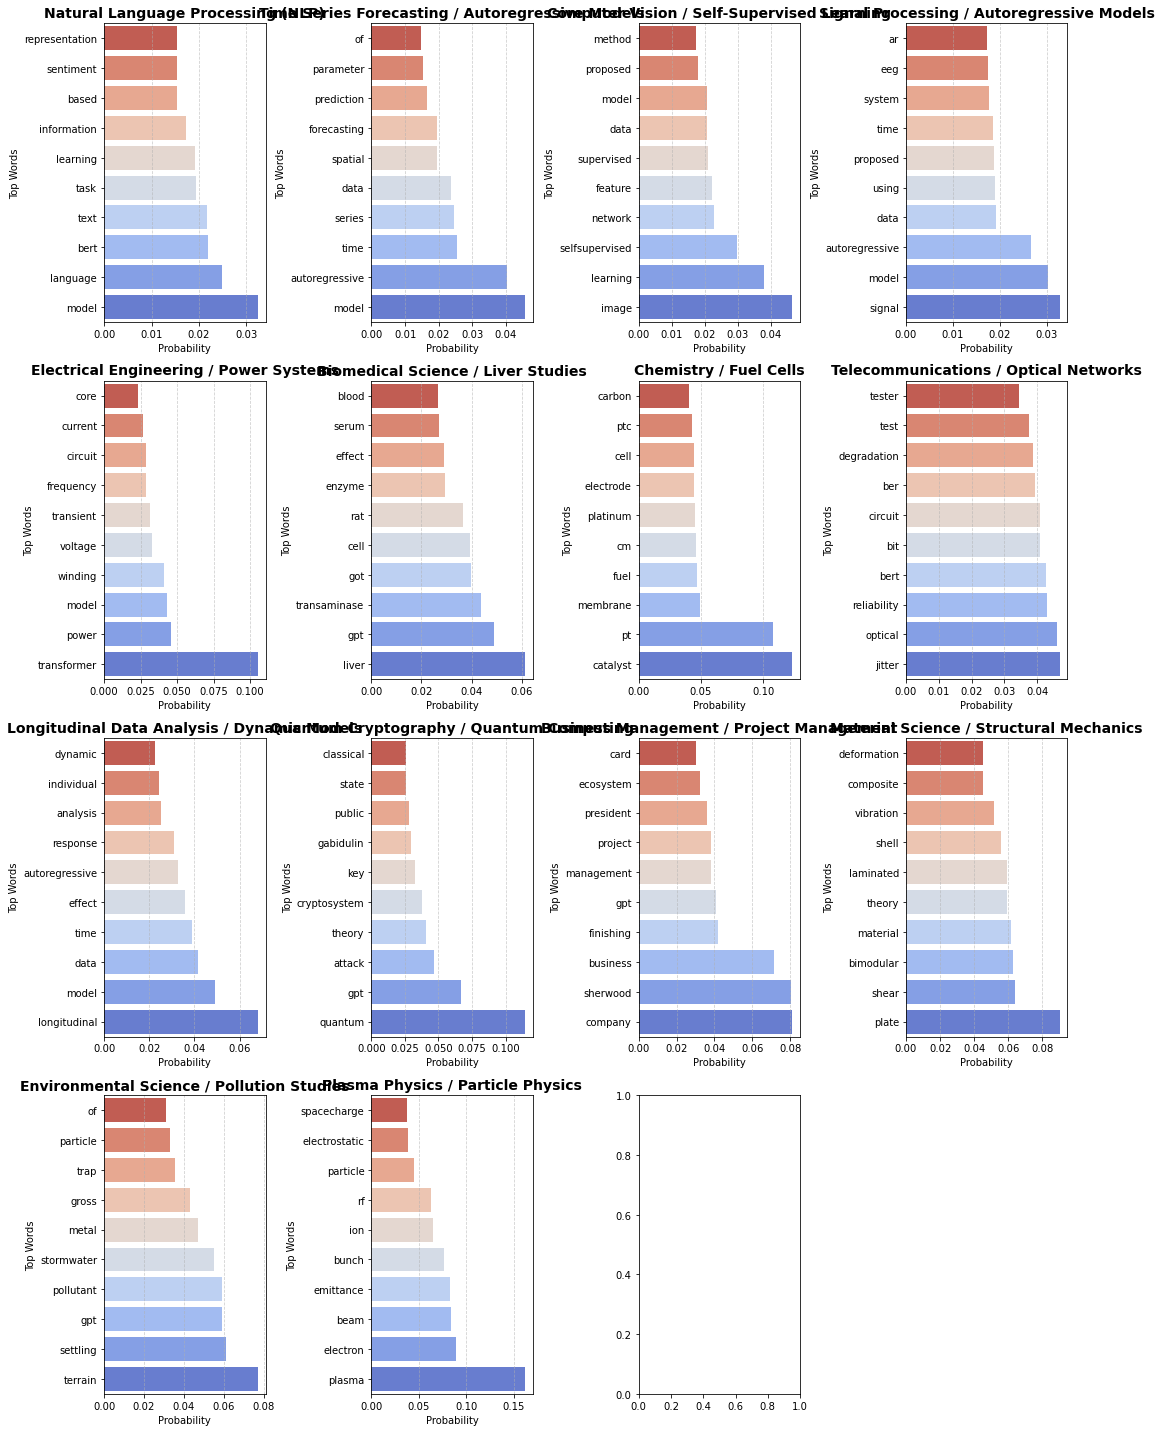

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Prepare the topic data (using the data you provided)
topic_data = [
    {'Topic ID': 0, 'Top 10 Words': ['model', 'language', 'bert', 'text', 'task', 'learning', 'information', 'based', 'sentiment', 'representation'], 'Probabilities': [0.0324, 0.0248, 0.0218, 0.0217, 0.0193, 0.0192, 0.0172, 0.0154, 0.0154, 0.0153]},
    {'Topic ID': 1, 'Top 10 Words': ['model', 'autoregressive', 'time', 'series', 'data', 'spatial', 'forecasting', 'prediction', 'parameter', 'of'], 'Probabilities': [0.0457, 0.0404, 0.0254, 0.0246, 0.0238, 0.0196, 0.0194, 0.0164, 0.0154, 0.0146]},
    {'Topic ID': 2, 'Top 10 Words': ['image', 'learning', 'selfsupervised', 'network', 'feature', 'supervised', 'data', 'model', 'proposed', 'method'], 'Probabilities': [0.0465, 0.0378, 0.0298, 0.0227, 0.0222, 0.0210, 0.0208, 0.0207, 0.0180, 0.0174]},
    {'Topic ID': 3, 'Top 10 Words': ['signal', 'model', 'autoregressive', 'data', 'using', 'proposed', 'time', 'system', 'eeg', 'ar'], 'Probabilities': [0.0328, 0.0304, 0.0266, 0.0191, 0.0189, 0.0188, 0.0185, 0.0176, 0.0174, 0.0173]},
    {'Topic ID': 4, 'Top 10 Words': ['transformer', 'power', 'model', 'winding', 'voltage', 'transient', 'frequency', 'circuit', 'current', 'core'], 'Probabilities': [0.1052, 0.0460, 0.0428, 0.0407, 0.0331, 0.0313, 0.0288, 0.0287, 0.0269, 0.0231]},
    {'Topic ID': 5, 'Top 10 Words': ['liver', 'gpt', 'transaminase', 'got', 'cell', 'rat', 'enzyme', 'effect', 'serum', 'blood'], 'Probabilities': [0.0614, 0.0488, 0.0438, 0.0397, 0.0395, 0.0364, 0.0295, 0.0288, 0.0268, 0.0265]},
    {'Topic ID': 6, 'Top 10 Words': ['catalyst', 'pt', 'membrane', 'fuel', 'cm', 'platinum', 'electrode', 'cell', 'ptc', 'carbon'], 'Probabilities': [0.1236, 0.1077, 0.0493, 0.0465, 0.0457, 0.0455, 0.0446, 0.0442, 0.0426, 0.0401]},
    {'Topic ID': 7, 'Top 10 Words': ['jitter', 'optical', 'reliability', 'bert', 'bit', 'circuit', 'ber', 'degradation', 'test', 'tester'], 'Probabilities': [0.0469, 0.0462, 0.0430, 0.0426, 0.0409, 0.0408, 0.0394, 0.0386, 0.0375, 0.0346]},
    {'Topic ID': 8, 'Top 10 Words': ['longitudinal', 'model', 'data', 'time', 'effect', 'autoregressive', 'response', 'analysis', 'individual', 'dynamic'], 'Probabilities': [0.0681, 0.0492, 0.0415, 0.0391, 0.0358, 0.0326, 0.0311, 0.0252, 0.0243, 0.0227]},
    {'Topic ID': 9, 'Top 10 Words': ['quantum', 'gpt', 'attack', 'theory', 'cryptosystem', 'key', 'gabidulin', 'public', 'state', 'classical'], 'Probabilities': [0.1146, 0.0668, 0.0464, 0.0408, 0.0374, 0.0324, 0.0298, 0.0280, 0.0259, 0.0257]},
    {'Topic ID': 10, 'Top 10 Words': ['company', 'sherwood', 'business', 'finishing', 'gpt', 'management', 'project', 'president', 'ecosystem', 'card'], 'Probabilities': [0.0812, 0.0806, 0.0716, 0.0417, 0.0409, 0.0383, 0.0380, 0.0361, 0.0322, 0.0304]},
    {'Topic ID': 11, 'Top 10 Words': ['plate', 'shear', 'bimodular', 'material', 'theory', 'laminated', 'shell', 'vibration', 'composite', 'deformation'], 'Probabilities': [0.0903, 0.0638, 0.0629, 0.0616, 0.0596, 0.0593, 0.0557, 0.0519, 0.0455, 0.0454]},
    {'Topic ID': 12, 'Top 10 Words': ['terrain', 'settling', 'gpt', 'pollutant', 'stormwater', 'metal', 'gross', 'trap', 'particle', 'of'], 'Probabilities': [0.0770, 0.0610, 0.0590, 0.0589, 0.0548, 0.0469, 0.0429, 0.0357, 0.0331, 0.0311]},
    {'Topic ID': 13, 'Top 10 Words': ['plasma', 'electron', 'beam', 'emittance', 'bunch', 'ion', 'rf', 'particle', 'electrostatic', 'spacecharge'], 'Probabilities': [0.1622, 0.0892, 0.0838, 0.0825, 0.0762, 0.0651, 0.0633, 0.0452, 0.0388, 0.0375]}
]

# Convert topic data to a DataFrame
topic_df = pd.DataFrame(topic_data)

# Step 2: Create labels for each topic
topic_labels = {
    0: "Natural Language Processing (NLP)",
    1: "Time Series Forecasting / Autoregressive Models",
    2: "Computer Vision / Self-Supervised Learning",
    3: "Signal Processing / Autoregressive Models",
    4: "Electrical Engineering / Power Systems",
    5: "Biomedical Science / Liver Studies",
    6: "Chemistry / Fuel Cells",
    7: "Telecommunications / Optical Networks",
    8: "Longitudinal Data Analysis / Dynamic Models",
    9: "Quantum Cryptography / Quantum Computing",
    10: "Business Management / Project Management",
    11: "Material Science / Structural Mechanics",
    12: "Environmental Science / Pollution Studies",
    13: "Plasma Physics / Particle Physics"
}

# Step 3: Plot each topic's top words and their probabilities
fig, axes = plt.subplots(4, 4, figsize=(15, 20))  # Create 4x4 grid for the top 14 topics
axes = axes.flatten()

# Step 4: Plot each topic
for i, (index, row) in enumerate(topic_df.iterrows()):
    ax = axes[i]
    words = row['Top 10 Words']
    probabilities = row['Probabilities']
    
    # Create a horizontal bar plot
    sns.barplot(x=probabilities, y=words, ax=ax, palette="coolwarm")
    
    # Add the corresponding label to the title
    ax.set_title(topic_labels[row['Topic ID']], fontsize=14, fontweight='bold')
    ax.set_xlabel('Probability', fontsize=10)
    ax.set_ylabel('Top Words', fontsize=10)
    ax.grid(True, which='both', axis='x', linestyle='--', alpha=0.6)
    ax.invert_yaxis()

# Remove the last empty subplot
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()
